## Import All Required Modules

In [1755]:
# Import All required libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import statsmodels.api as sm

from bs4 import BeautifulSoup
import requests
from time import sleep


In [1459]:
import sklearn
from sklearn import neighbors, tree, ensemble, naive_bayes, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
# *** Decision Tree; Random Forest
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# *** Naive Bayes
from sklearn.naive_bayes import GaussianNB
# *** SVM classifier
from sklearn.svm import SVC
# --------  metrics:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import make_scorer

## Web Scaraping

#### List Of Statistics URL from Seasson 2021-2022

In [1756]:
#Players Stats URLs Seasson 2021-2022
url_players_stats = "https://fbref.com/en/comps/Big5/stats/players/Big-5-European-Leagues-Stats"
url_player_passing = "https://fbref.com/en/comps/Big5/passing/players/Big-5-European-Leagues-Stats"
url_players_shooting = "https://fbref.com/en/comps/Big5/shooting/players/Big-5-European-Leagues-Stats"
url_player_creation = "https://fbref.com/en/comps/Big5/gca/players/Big-5-European-Leagues-Stats"
url_player_defense = "https://fbref.com/en/comps/Big5/defense/players/Big-5-European-Leagues-Stats"
url_players_miscellaneous  = "https://fbref.com/en/comps/Big5/misc/players/Big-5-European-Leagues-Stats"
url_list=[url_players_stats, url_player_passing, url_players_shooting, url_player_creation, url_player_defense, url_players_miscellaneous]


#### Function to check url status (OK / ERROR)

In [1757]:
# Function to Check url status
def check_url_status(url):
    response_stats = requests.get(url)
    if((response_stats.status_code) == 200):
        status = "OK"
    else:
        status = "ERROR"
    return status

#### Check the status of each url from the list

In [1758]:
# Check all URls Response code

for i in range(len(url_list)):
    url_status = check_url_status(url_list[i])
    print("status:",url_status, "-" ,url_list[i])
        

status: OK - https://fbref.com/en/comps/Big5/stats/players/Big-5-European-Leagues-Stats
status: OK - https://fbref.com/en/comps/Big5/passing/players/Big-5-European-Leagues-Stats
status: OK - https://fbref.com/en/comps/Big5/shooting/players/Big-5-European-Leagues-Stats
status: OK - https://fbref.com/en/comps/Big5/gca/players/Big-5-European-Leagues-Stats
status: OK - https://fbref.com/en/comps/Big5/defense/players/Big-5-European-Leagues-Stats
status: OK - https://fbref.com/en/comps/Big5/misc/players/Big-5-European-Leagues-Stats


#### Build Soup for each url category

In [1759]:
# Create Soup and table for all URLs
soup_stats = []
soup_pass = []
soup_shoot =[]
soup_creation = []
soup_defense = []
soup_miscellaneous = []

table_stats = []
table_pass = []
table_shoot = []
table_creation = []
table_defense = []
table_miscellaneous = []

soup_list = [soup_stats, soup_pass, soup_shoot, soup_creation, soup_defense, soup_miscellaneous]
table_list = [table_stats, table_pass, table_shoot, table_creation, table_defense, table_miscellaneous]

for i in range(len(soup_list)):
    response_stats = requests.get(url_list[i])
    print(url_list[i])
    soup_list[i] = BeautifulSoup(response_stats.text,"html.parser")
    if(soup_list[i] == None):
        print("Unable to Create soup")
    else:
        print("Soup Created")
        table_list[i] = soup_list[i].find("table")

        
        
soup_stats = soup_list[0]
soup_pass = soup_list[1]
soup_shoot =soup_list[2]
soup_creation = soup_list[3]
soup_defense = soup_list[4]
soup_miscellaneous = soup_list[5]

table_stats = table_list[0]
table_pass = table_list[1]
table_shoot = table_list[2]
table_creation = table_list[3]
table_defense = table_list[4]
table_miscellaneous = table_list[5]



https://fbref.com/en/comps/Big5/stats/players/Big-5-European-Leagues-Stats
Soup Created
https://fbref.com/en/comps/Big5/passing/players/Big-5-European-Leagues-Stats
Soup Created
https://fbref.com/en/comps/Big5/shooting/players/Big-5-European-Leagues-Stats
Soup Created
https://fbref.com/en/comps/Big5/gca/players/Big-5-European-Leagues-Stats
Soup Created
https://fbref.com/en/comps/Big5/defense/players/Big-5-European-Leagues-Stats
Soup Created
https://fbref.com/en/comps/Big5/misc/players/Big-5-European-Leagues-Stats
Soup Created


## Create DataFrames

In [1760]:
# Create DataFrame for Players Main Stats (1/6)

# table colums from inspect url
headers_stats = ['player_name','nationality','position','team','league','age','birth_year','match_played','match_starts','minutes_played','minutes_played_by_90m','goals','assists','goals_no_pen','goals_pen','pens_att','yellow_card','red_cards','goals_per_90','assists_per_90','goals_and_assists_per_90','goals_no_pen_per_90','goals_no_pen_and_assists_per_90','expected_goals','expected_goals_no_pen','expected_assists','expected_goals_and_assists_no_pen','expected_goals_per_90','expected_assists_per_90','expected_goals_and_assists_per_90','expected_goals_no_pen_per_90','expected_goals_and_assists_no_pen_per_90','matches']
df_stats = pd.DataFrame(columns=headers_stats)

i=0
for j in table_stats.find_all('tr')[1:]:
    row_data = j.find_all('td')
    row = [tr.text for tr in row_data]
    if row != []:
        #print(row)
        df_stats.loc[i] = row
        i=i+1
        
df_stats

player_name nationality position           team  \
0            Max Aarons     eng ENG       DF   Norwich City   
1      Yunis Abdelhamid      ma MAR       DF          Reims   
2     Salis Abdul Samed      gh GHA       MF  Clermont Foot   
3       Laurent Abergel      fr FRA       MF        Lorient   
4           Charles Abi      fr FRA       FW  Saint-Étienne   
...                 ...         ...      ...            ...   
2916   Martín Zubimendi      es ESP       MF  Real Sociedad   
2917   Szymon Żurkowski      pl POL       MF         Empoli   
2918    Martin Ødegaard      no NOR       MF        Arsenal   
2919        Milan Đurić      ba BIH       FW    Salernitana   
2920      Filip Đuričić      rs SRB    MF,FW       Sassuolo   

                  league age birth_year match_played match_starts  \
0     eng Premier League  21       2000           34           32   
1             fr Ligue 1  33       1987           34           34   
2             fr Ligue 1  21       2000           31           29   
3             fr Ligue 1  28       1993           34           34   
4             fr Ligue 1  21       2000            1            1   
...                  ...  ..        ...          ...          ...   
2916          es La Liga  22       1999           36           26   
2917          it Serie A  23       1997           35           29   
2918  eng Premier League  22       1998           36           32   
2919          it Serie A  31       1990           33           23   
2920          it Serie A  29       1992           12            9   

     minutes_played  ... expected_goals expected_goals_no_pen  \
0             2,881  ...            0.7                   0.7   
1             2,983  ...            1.2                   1.2   
2             2,462  ...            0.8                   0.8   
3             2,956  ...            2.0                   2.0   
4                45  ...            0.0                   0.0   
...             ...  ...            ...                   ...   
2916          2,591  ...            2.0                   2.0   
2917          2,307  ...            4.1                   4.1   
2918          2,785  ...            4.8                   4.8   
2919          2,165  ...            5.8                   5.0   
2920            671  ...            2.0                   2.0   

     expected_assists expected_goals_and_assists_no_pen expected_goals_per_90  \
0                 1.4                               2.1                  0.02   
1                 0.8                               2.1                  0.04   
2                 1.1                               1.9                  0.03   
3                 2.9                               4.9                  0.06   
4                 0.0                               0.0                  0.00   
...               ...                               ...                   ...   
2916              1.0                               3.0                  0.07   
2917              1.5                               5.5                  0.16   
2918              6.8                              11.6                  0.16   
2919              3.1                               8.1                  0.24   
2920              1.3                               3.3                  0.27   

     expected_assists_per_90 expected_goals_and_assists_per_90  \
0                       0.04                              0.07   
1                       0.02                              0.06   
2                       0.04                              0.07   
3                       0.09                              0.15   
4                       0.00                              0.00   
...                      ...                               ...   
2916                    0.04                              0.10   
2917                    0.06                              0.22   
2918                    0.22                              0.38   
2919        

In [1761]:
# Create DataFrame for Players Passing Stats (2/6)

# table colums from inspect url
headers_passing = ['player_name','nationality','position','team','league','age','birth_year','minutes_played_by_90m','total_pass_completed','total_pass_attempted','pass_completed_percentage','total_pass_dist','total_pass_dist_forward','short_pass_completed','short_pass_attempted','short_pass_percentage','mid_pass_completed','mid_pass_attempted','mid_pass_percentage','long_pass_completed','long_pass_attempted','long_pass_percentage','assists','expected_assists','assists_minus_expected_assists','pass_lead_to_shot','pass_30_court(na)','pass_18_court(na)','crosses_18_court(na)','progressive_pass(na)','matches']
df_passing = pd.DataFrame(columns=headers_passing)

i=0
for j in table_pass.find_all('tr')[1:]:
    row_data = j.find_all('td')
    row = [tr.text for tr in row_data]
    if row != []:
        #print(row)
        df_passing.loc[i] = row
        i=i+1
        
df_passing


player_name nationality position           team  \
0            Max Aarons     eng ENG       DF   Norwich City   
1      Yunis Abdelhamid      ma MAR       DF          Reims   
2     Salis Abdul Samed      gh GHA       MF  Clermont Foot   
3       Laurent Abergel      fr FRA       MF        Lorient   
4           Charles Abi      fr FRA       FW  Saint-Étienne   
...                 ...         ...      ...            ...   
2916   Martín Zubimendi      es ESP       MF  Real Sociedad   
2917   Szymon Żurkowski      pl POL       MF         Empoli   
2918    Martin Ødegaard      no NOR       MF        Arsenal   
2919        Milan Đurić      ba BIH       FW    Salernitana   
2920      Filip Đuričić      rs SRB    MF,FW       Sassuolo   

                  league age birth_year minutes_played_by_90m  \
0     eng Premier League  21       2000                  32.0   
1             fr Ligue 1  33       1987                  33.1   
2             fr Ligue 1  21       2000                  27.4   
3             fr Ligue 1  28       1993                  32.8   
4             fr Ligue 1  21       2000                   0.5   
...                  ...  ..        ...                   ...   
2916          es La Liga  22       1999                  28.8   
2917          it Serie A  23       1997                  25.6   
2918  eng Premier League  22       1998                  30.9   
2919          it Serie A  31       1990                  24.1   
2920          it Serie A  29       1992                   7.5   

     total_pass_completed total_pass_attempted  ... long_pass_percentage  \
0                    1087                 1440  ...                 45.2   
1                    1281                 1555  ...                 61.7   
2                    1532                 1671  ...                 86.0   
3                    1334                 1635  ...                 66.6   
4                       2                    6  ...                        
...                   ...                  ...  ...                  ...   
2916                 1243                 1453  ...                 70.6   
2917                  733                  915  ...                 60.4   
2918                 1355                 1598  ...                 68.6   
2919                  427                  682  ...                 64.3   
2920                  184                  226  ...                 85.7   

     assists expected_assists assists_minus_expected_assists  \
0          2              1.4                           +0.6   
1          0              0.8                           -0.8   
2          0              1.1                           -1.1   
3          2              2.9                           -0.9   
4          0              0.0                            0.0   
...      ...              ...                            ...   
2916       1              1.0                            0.0   
2917       2              1.5                           +0.5   
2918       4              6.8                           -2.8   
2919       4              3.1                           +0.9   
2920       1              1.3                           -0.3   

     pass_lead_to_shot pass_30_court(na) pass_18_court(na)  \
0                   19                50                36   
1                    8                81                 6   
2                   15                77                13   
3                   30               127                19   
4                    0                 0                 0   
...                ...               ...               ...   
2916                15               121                10   
2917                19                53                20   
2918                76               100                65   
2919                32                18                 4   
2920                11                13                18   

     crosses_18_court(na) progressive_pass(na) 

In [1762]:
# Create DataFrame for Players Shooting Stats (3/6)

# table colums from inspect url
headers_shooting = ['player_name','nationality','position','team','league','age','birth_year','match_by_90m','goals','total_shots','shots_on_target','shots_on_target_percent','total_shots_per_90m','shots_on_target_per_90m','goals_per_shots','goals_per_shot_on_target','average_shot_distance_meter','free_kick_shots','pens_made','pens_attempted','expected_goals','expected_goals_no_pens','expected_goal_per_shot_no_pens','goals_minus_expected_goals','non_pens_goals_minus_expected_pens_goals','matches']
df_shooting = pd.DataFrame(columns=headers_shooting)

i=0
for j in table_shoot.find_all('tr')[1:]:
    row_data = j.find_all('td')
    row = [tr.text for tr in row_data]
    if row != []:
        #print(row)
        df_shooting.loc[i] = row
        i=i+1
        
df_shooting

player_name nationality position           team  \
0            Max Aarons     eng ENG       DF   Norwich City   
1      Yunis Abdelhamid      ma MAR       DF          Reims   
2     Salis Abdul Samed      gh GHA       MF  Clermont Foot   
3       Laurent Abergel      fr FRA       MF        Lorient   
4           Charles Abi      fr FRA       FW  Saint-Étienne   
...                 ...         ...      ...            ...   
2916   Martín Zubimendi      es ESP       MF  Real Sociedad   
2917   Szymon Żurkowski      pl POL       MF         Empoli   
2918    Martin Ødegaard      no NOR       MF        Arsenal   
2919        Milan Đurić      ba BIH       FW    Salernitana   
2920      Filip Đuričić      rs SRB    MF,FW       Sassuolo   

                  league age birth_year match_by_90m goals total_shots  ...  \
0     eng Premier League  21       2000         32.0     0          13  ...   
1             fr Ligue 1  33       1987         33.1     2          18  ...   
2             fr Ligue 1  21       2000         27.4     1          18  ...   
3             fr Ligue 1  28       1993         32.8     0          30  ...   
4             fr Ligue 1  21       2000          0.5     0           0  ...   
...                  ...  ..        ...          ...   ...         ...  ...   
2916          es La Liga  22       1999         28.8     2          21  ...   
2917          it Serie A  23       1997         25.6     6          47  ...   
2918  eng Premier League  22       1998         30.9     7          53  ...   
2919          it Serie A  31       1990         24.1     5          50  ...   
2920          it Serie A  29       1992          7.5     2          18  ...   

     average_shot_distance_meter free_kick_shots pens_made pens_attempted  \
0                           20.5               0         0              0   
1                           18.7               0         0              0   
2                           20.3               0         0              0   
3                           22.6               0         0              0   
4                                              0         0              0   
...                          ...             ...       ...            ...   
2916                        13.7               0         0              0   
2917                        18.8               0         0              0   
2918                        20.1              12         0              0   
2919                        10.1               0         1              1   
2920                        15.7               0         0              0   

     expected_goals expected_goals_no_pens expected_goal_per_shot_no_pens  \
0               0.7                    0.7                           0.05   
1               1.2                    1.2                           0.07   
2               0.8                    0.8                           0.04   
3               2.0                    2.0                           0.07   
4               0.0                    0.0                                  
...             ...                    ...                            ...   
2916            2.0                    2.0                           0.09   
2917            4.1                    4.1                           0.09   
2918            4.8                    4.8                           0.09   
2919            5.8                    5.0                           0.10   
2920            2.0                    2.0                           0.11   

     goals_minus_expected_goals non_pens_goals_minus_expected_pens_goals  \
0                          -0.7                                     -0.7   
1                          +0.8                                     +0.8   
2                          +0.2                                     +0.2   
3                          -2.0                                     -2.0   
4                           0.0                                      0.0   


In [1763]:
# Create DataFrame for Players Goals Creation Stats (4/6)

# table colums from inspect url
headers_creation = ['player_name','nationality','position','team','league','age','birth_year','minutes_played_by_90m','total_shots_creation','shot_creation_by_90m','total_success_pass','total_miss_pass','total_success_dribble','total_shots_lead_to_attempt','total_earned_fouls','defense_action_lead_to_attempt','total_goal_creation','goal_creation_by_90m','total_pass_lead_to_goal','total_miss_pass_lead_to_goal','total_dribble_lead_to_goal','total_shots_lead_to_goal','total_earned_fould_lead_to_goal','defense_action_lead_to_goal','matches']
df_creation = pd.DataFrame(columns=headers_creation)

i=0
for j in table_creation.find_all('tr')[1:]:
    row_data = j.find_all('td')
    row = [tr.text for tr in row_data]
    if row != []:
        #print(row)
        df_creation.loc[i] = row
        i=i+1
        
df_creation

player_name nationality position           team  \
0            Max Aarons     eng ENG       DF   Norwich City   
1      Yunis Abdelhamid      ma MAR       DF          Reims   
2     Salis Abdul Samed      gh GHA       MF  Clermont Foot   
3       Laurent Abergel      fr FRA       MF        Lorient   
4           Charles Abi      fr FRA       FW  Saint-Étienne   
...                 ...         ...      ...            ...   
2916   Martín Zubimendi      es ESP       MF  Real Sociedad   
2917   Szymon Żurkowski      pl POL       MF         Empoli   
2918    Martin Ødegaard      no NOR       MF        Arsenal   
2919        Milan Đurić      ba BIH       FW    Salernitana   
2920      Filip Đuričić      rs SRB    MF,FW       Sassuolo   

                  league age birth_year minutes_played_by_90m  \
0     eng Premier League  21       2000                  32.0   
1             fr Ligue 1  33       1987                  33.1   
2             fr Ligue 1  21       2000                  27.4   
3             fr Ligue 1  28       1993                  32.8   
4             fr Ligue 1  21       2000                   0.5   
...                  ...  ..        ...                   ...   
2916          es La Liga  22       1999                  28.8   
2917          it Serie A  23       1997                  25.6   
2918  eng Premier League  22       1998                  30.9   
2919          it Serie A  31       1990                  24.1   
2920          it Serie A  29       1992                   7.5   

     total_shots_creation shot_creation_by_90m  ...  \
0                      38                 1.19  ...   
1                      21                 0.63  ...   
2                      40                 1.46  ...   
3                      66                 2.01  ...   
4                       0                 0.00  ...   
...                   ...                  ...  ...   
2916                   34                 1.18  ...   
2917                   60                 2.34  ...   
2918                  134                 4.33  ...   
2919                   56                 2.33  ...   
2920                   23                 3.08  ...   

     defense_action_lead_to_attempt total_goal_creation goal_creation_by_90m  \
0                                 0                   5                 0.16   
1                                 3                   1                 0.03   
2                                 2                   1                 0.04   
3                                 6                   5                 0.15   
4                                 0                   0                 0.00   
...                             ...                 ...                  ...   
2916                              3                   1                 0.03   
2917                              0                   4                 0.16   
2918                              1                  12                 0.39   
2919                              0                   8                 0.33   
2920                              1                   2                 0.27   

     total_pass_lead_to_goal total_miss_pass_lead_to_goal  \
0                          5                            0   
1                          0                            0   
2                          1                            0   
3                          4                            0   
4                          0                            0   
...                      ...                          ...   
2916                       1                            0   
2917                       3                            0   
2918                      12                            0   
2919                       5                            0   
2920                       2                            0   

     total_dribble_lead_to_goal total_shots_lead_to_goal  \
0                             0                        0   

In [1764]:
# Create DataFrame for Players Defensive Stats (5/6)

# table colums from inspect url
headers_defense = ['player_name','nationality','position','team','league','age','birth_year','minutes_played_by_90m','total_tackels','total_tackels_won','total_defensive_tackels','total_mid_tackels','total_attack_tackels','total_dribblers_tackled','total_dribbles_contested','dribbles_tackeld_by_percentage','total_dribbled_past','total_pressures','total_successful_pressures','successful_pressure_percentage','total_pressure_defense','total_pressure_mid','total_pressure_attack','total_blocks','total_shots_blocked','total_shots_saved','total_passes_blocked','total_interceptions','total_tackels_plus_interceptions','total_clearances','total_mistakes','matches']
df_defense = pd.DataFrame(columns=headers_defense)

i=0
for j in table_defense.find_all('tr')[1:]:
    row_data = j.find_all('td')
    row = [tr.text for tr in row_data]
    if row != []:
        #print(row)
        df_defense.loc[i] = row
        i=i+1
        
df_defense
        

player_name nationality position           team  \
0            Max Aarons     eng ENG       DF   Norwich City   
1      Yunis Abdelhamid      ma MAR       DF          Reims   
2     Salis Abdul Samed      gh GHA       MF  Clermont Foot   
3       Laurent Abergel      fr FRA       MF        Lorient   
4           Charles Abi      fr FRA       FW  Saint-Étienne   
...                 ...         ...      ...            ...   
2916   Martín Zubimendi      es ESP       MF  Real Sociedad   
2917   Szymon Żurkowski      pl POL       MF         Empoli   
2918    Martin Ødegaard      no NOR       MF        Arsenal   
2919        Milan Đurić      ba BIH       FW    Salernitana   
2920      Filip Đuričić      rs SRB    MF,FW       Sassuolo   

                  league age birth_year minutes_played_by_90m total_tackels  \
0     eng Premier League  21       2000                  32.0            69   
1             fr Ligue 1  33       1987                  33.1            62   
2             fr Ligue 1  21       2000                  27.4            55   
3             fr Ligue 1  28       1993                  32.8           117   
4             fr Ligue 1  21       2000                   0.5             0   
...                  ...  ..        ...                   ...           ...   
2916          es La Liga  22       1999                  28.8            61   
2917          it Serie A  23       1997                  25.6            71   
2918  eng Premier League  22       1998                  30.9            43   
2919          it Serie A  31       1990                  24.1             6   
2920          it Serie A  29       1992                   7.5            12   

     total_tackels_won  ... total_pressure_attack total_blocks  \
0                   37  ...                    39           86   
1                   46  ...                    29           62   
2                   34  ...                   108           27   
3                   73  ...                   112           55   
4                    0  ...                     3            1   
...                ...  ...                   ...          ...   
2916                32  ...                    46           39   
2917                49  ...                   116           52   
2918                25  ...                   205           18   
2919                 4  ...                   141           10   
2920                 7  ...                    29            9   

     total_shots_blocked total_shots_saved total_passes_blocked  \
0                     22                 1                   64   
1                     26                 2                   36   
2                      1                 0                   26   
3                      3                 0                   52   
4                      0                 0                    1   
...                  ...               ...                  ...   
2916                  14                 0                   25   
2917                  11                 1                   41   
2918                   1                 0                   17   
2919                   3                 0                    7   
2920                   1                 0                    8   

     total_interceptions total_tackels_plus_interceptions total_clearances  \
0                     56                              125               70   
1                    103                              165              106   
2                     51                              106               15   
3                     84                              201               11   
4                      0                                0                0   
...                  ...                              ...              ...   
2916                  49                              110               65   
2917                  57                              128               30   
2918  

In [1765]:
# Create DataFrame for Players Miscellaneous Stats (6/6)

# table colums from inspect url
headers_miscellaneous = ['player_name','nationality','position','team','league','age','birth_year','minutes_by_90','yellow_cards','red_cards','second_yellow_card','fouls_commited','fouls_drawn','offsides','crosses','interceptions','tackels_won','pens_won','pens_conceded','own_goals','ball_recoveries','aerials_won','aerials_lost','aerials_won_percent','matches']
df_miscellaneous = pd.DataFrame(columns=headers_miscellaneous)

i=0
for j in table_miscellaneous.find_all('tr')[1:]:
    row_data = j.find_all('td')
    row = [tr.text for tr in row_data]
    if row != []:
        #print(row)
        df_miscellaneous.loc[i] = row
        i=i+1
        
df_miscellaneous

player_name nationality position           team  \
0            Max Aarons     eng ENG       DF   Norwich City   
1      Yunis Abdelhamid      ma MAR       DF          Reims   
2     Salis Abdul Samed      gh GHA       MF  Clermont Foot   
3       Laurent Abergel      fr FRA       MF        Lorient   
4           Charles Abi      fr FRA       FW  Saint-Étienne   
...                 ...         ...      ...            ...   
2916   Martín Zubimendi      es ESP       MF  Real Sociedad   
2917   Szymon Żurkowski      pl POL       MF         Empoli   
2918    Martin Ødegaard      no NOR       MF        Arsenal   
2919        Milan Đurić      ba BIH       FW    Salernitana   
2920      Filip Đuričić      rs SRB    MF,FW       Sassuolo   

                  league age birth_year minutes_by_90 yellow_cards red_cards  \
0     eng Premier League  21       2000          32.0            8         0   
1             fr Ligue 1  33       1987          33.1            5         1   
2             fr Ligue 1  21       2000          27.4           12         3   
3             fr Ligue 1  28       1993          32.8            9         0   
4             fr Ligue 1  21       2000           0.5            0         0   
...                  ...  ..        ...           ...          ...       ...   
2916          es La Liga  22       1999          28.8            4         0   
2917          it Serie A  23       1997          25.6            5         0   
2918  eng Premier League  22       1998          30.9            4         0   
2919          it Serie A  31       1990          24.1            6         0   
2920          it Serie A  29       1992           7.5            1         0   

      ... interceptions tackels_won pens_won pens_conceded own_goals  \
0     ...            56          37        0             2         1   
1     ...           103          46        0             1         0   
2     ...            51          34        0             0         0   
3     ...            84          73        0             0         0   
4     ...             0           0        0             0         0   
...   ...           ...         ...      ...           ...       ...   
2916  ...            49          32        0             0         0   
2917  ...            57          49        0             1         0   
2918  ...            22          25        0             2         0   
2919  ...             2           4        1             0         0   
2920  ...             5           7        0             0         0   

     ball_recoveries aerials_won aerials_lost aerials_won_percent  matches  
0                177          15           51                22.7  Matches  
1                224          67           45                59.8  Matches  
2                240          24           24                50.0  Matches  
3                291          14           14                50.0  Matches  
4                  2           1            0               100.0  Matches  
...              ...         ...          ...                 ...      ...  
2916             271          77           40                65.8  Matches  
2917             206          26           40                39.4  Matches  
2918             230          17           25                40.5  Matches  
2919              78         298          116                72.0  Matches  
2920              35           3            5                37.5  Matches  

[2921 rows x 25 columns]

### Function to Export & Load CSV

In [144]:
# Function to load CSV with specific encoding for utf 8
def load_csv(path):
    df = pd.read_csv(path,encoding='utf-8')
    return df

In [220]:
# Function to Export csv function with utf 8 encoding
def export_csv(df,path,filename):
    filename = "{}.csv".format(filename)
    path = "{}\{}".format(path,filename)
    df.to_csv(path,encoding='utf-8')

In [15]:
# Test Function load_csv
#df_stats = load_csv("C:\Python_Projects\CSV\player_stats_dataframe.csv")

In [87]:
# Create New DataFrame with by custom columns
custom_headers = ["first_name","last_name","full_name","team","position","value"]
df_values = pd.DataFrame(columns=custom_headers)

In [88]:
# Move Columns from df_stats to df_values
df_values["full_name"] = df_stats["player_name"].values
df_values["team"] = df_stats["team"].values
df_values["position"] = df_stats["position"].values


### Function for Split Full Name to First and Last
#### *  Require for searching the players vlaue on transfermarket

In [89]:
# Function to Split player full_name to first_name and last_name
# Needed for searchine player value in transfermarket website later
def split_first_last(full_name):
    if " " not in full_name:
        first_name = full_name
        last_name = "NaN"
        return first_name,last_name
    else:
        first_name = full_name.split(" ")[0]
        last_name = full_name.split(" ",1)[1]
        return first_name,last_name
    

In [90]:
# Testing Split function
full_name = "Miguel Ángel Rubio"
first_name, last_name = split_first_last(full_name)
print("first name:",first_name,"\nlast name:",last_name)

first name: Miguel 
last name: Ángel Rubio


In [91]:
# Fill Columns Data in df_values with full_name, first_name, last_name

i=0

for full_name in df_values["full_name"]:
    first_name, last_name = split_first_last(full_name)
    df_values["first_name"][i] = first_name
    df_values["last_name"][i] = last_name
    i=i+1
       

In [92]:
df_values

first_name    last_name          full_name           team position value
0           Max       Aarons         Max Aarons   Norwich City       DF   NaN
1         Yunis   Abdelhamid   Yunis Abdelhamid          Reims       DF   NaN
2         Salis  Abdul Samed  Salis Abdul Samed  Clermont Foot       MF   NaN
3       Laurent      Abergel    Laurent Abergel        Lorient       MF   NaN
4       Charles          Abi        Charles Abi  Saint-Étienne       FW   NaN
...         ...          ...                ...            ...      ...   ...
2916     Martín    Zubimendi   Martín Zubimendi  Real Sociedad       MF   NaN
2917     Szymon    Żurkowski   Szymon Żurkowski         Empoli       MF   NaN
2918     Martin     Ødegaard    Martin Ødegaard        Arsenal       MF   NaN
2919      Milan        Đurić        Milan Đurić    Salernitana       FW   NaN
2920      Filip      Đuričić      Filip Đuričić       Sassuolo    MF,FW   NaN

[2921 rows x 6 columns]

### Function to check player url status on transfermarket

In [93]:
# Function to check player url status

def check_player_url(url):
    headers = {'User-Agent': 
           'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}
    response_stats = requests.get(url, headers=headers)
    if((response_stats.status_code) == 200):
        status = "OK"
    else:
        status = "ERROR"  
    return status

### Function to search url page on transfermarket

In [94]:
# Function to check if player page exist or not in transfermarket
def search_player(transfermarket_soup):
    #check if header h2 exist
    value_h2 = transfermarket_soup.find_all('h2')
    if(value_h2):
        status = "NOT_FOUND"
    else:
        status = "FOUND"
    return status

### Function to get player value from transfermarket

In [95]:
# Function to get player value from transfermarket url
# return value if player exist and found, return NaN other.

def get_player_value(first_name,last_name,team):
    # get first char
    first_name = first_name[0]
    
    transfermarket_base_url = "https://www.transfermarkt.us/schnellsuche/ergebnis/schnellsuche?query={}%2C{}%3A{}".format(last_name,first_name,team)
    # check url
    status = check_player_url(transfermarket_base_url)
    if(status == 'OK'):
        headers = {'User-Agent': 
           'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}
        transfermarket_page_details = requests.get(transfermarket_base_url, headers=headers)
        transfermarket_soup = BeautifulSoup(transfermarket_page_details.text, 'html.parser')
        search_status = search_player(transfermarket_soup)
        
        if(search_status == "FOUND"):
            value = transfermarket_soup.find_all("td",{"class":"rechts hauptlink"})
            # retrun player value
            return value[0].text
        else:
            value = "NaN"
            return value
    else:
        value = "NaN"
        return value

In [96]:
# Search for each player value and fill the value columns in df_values
i=0
length = len(df_values["value"])

for value in range(len(df_values["value"])):
    first_name = df_values["first_name"][i]
    last_name = df_values["last_name"][i]
    team = df_values["team"][i]
    
    value = get_player_value(first_name,last_name,team)
    df_values["value"][i] = value
    print(i,"/",length, df_values["full_name"][i], "=",value)
    i=i+1

0 / 2921 Max Aarons = $24.20m
1 / 2921 Yunis Abdelhamid = $1.32m
2 / 2921 Salis Abdul Samed = $3.30m
3 / 2921 Laurent Abergel = $3.30m
4 / 2921 Charles Abi = NaN
5 / 2921 Dickson Abiama = $880Th.
6 / 2921 Matthis Abline = NaN
7 / 2921 Tammy Abraham = $55.00m
8 / 2921 Luis Abram = NaN
9 / 2921 Francesco Acerbi = $4.40m
10 / 2921 Ragnar Ache = NaN
11 / 2921 Mohamed Achi = $330Th.
12 / 2921 Marcos Acuña = $19.80m
13 / 2921 Che Adams = $19.80m
14 / 2921 Tyler Adams = $18.70m
15 / 2921 Sargis Adamyan = NaN
16 / 2921 Martin Adeline = $880Th.
17 / 2921 Amine Adli = $13.20m
18 / 2921 Yacine Adli = $9.90m
19 / 2921 Michel Aebischer = $3.85m
20 / 2921 Felix Afena-Gyan = $6.60m
21 / 2921 Martin Agirregabiria = NaN
22 / 2921 Julen Agirrezabala = NaN
23 / 2921 Lucien Agoume = $7.70m
24 / 2921 Kevin Agudelo = $3.85m
25 / 2921 Nayef Aguerd = $13.20m
26 / 2921 Sergio Agüero = NaN
27 / 2921 Ruben Aguilar = $11.00m
28 / 2921 Álvaro Aguirre = -
29 / 2921 Naouirou Ahamada = $1.65m
30 / 2921 Anel Ahmedhodz

In [ ]:
# load df_value from csv
df_values = load_csv(r"C:\Python_Projects\CSV\df_values_20_06_2022.csv")

In [ ]:
# Test export function
path = "C:\Python_Projects\CSV"
filename = "df_values_20_06_2022"
export_csv(df_values_backup,path,filename)

In [ ]:
# Check Number of NaN Value in value column
df_values["value"].isna().sum()

In [ ]:
# remove "Unnamed: 0" from df_values
df_values = df_values.drop("Unnamed: 0", axis=1)

In [176]:
#Create backup datafarame
df_values_backup = df_values.copy()
df_stats_backup = df_stats.copy()
df_passing_backup = df_passing.copy()
df_shooting_backup = df_shooting.copy()
df_creation_backup = df_creation.copy()
df_defense_backup = df_defense.copy()
df_miscellaneous_backup = df_miscellaneous.copy()

In [ ]:
#df_values = df_values_backup
#df_stats = df_stats_backup
#df_passing = df_passing_backup
#df_shooting = df_shooting_backup
#df_creation = df_creation_backup
#df_defense = df_defense_backup
#df_miscellaneous = df_miscellaneous_backup

In [207]:
# Check if dataframe columns
df_defense.columns

Index(['player_name', 'nationality', 'position', 'team', 'league', 'age',
       'birth_year', 'minutes_played_by_90m', 'total_tackels',
       'total_tackels_won', 'total_defensive_tackels', 'total_mid_tackels',
       'total_attack_tackels', 'total_dribblers_tackled',
       'total_dribbles_contested', 'dribbles_tackeld_by_percentage',
       'total_dribbled_past', 'total_pressures', 'total_successful_pressures',
       'successful_pressure_percentage', 'total_pressure_defense',
       'total_pressure_mid', 'total_pressure_attack', 'total_blocks',
       'total_shots_blocked', 'total_shots_saved', 'total_passes_blocked',
       'total_interceptions', 'total_tackels_plus_interceptions',
       'total_clearances', 'total_mistakes', 'matches'],
      dtype='object')

In [208]:
# create new value column in each statistics dataframe
df_stats = df_stats.assign(value="")
df_passing = df_passing.assign(value="")
df_shooting = df_shooting.assign(value="")
df_creation = df_creation.assign(value="")
df_defense = df_defense.assign(value="")
df_miscellaneous = df_miscellaneous.assign(value="")

In [209]:
# Check if new columnds created
df_defense.columns

Index(['player_name', 'nationality', 'position', 'team', 'league', 'age',
       'birth_year', 'minutes_played_by_90m', 'total_tackels',
       'total_tackels_won', 'total_defensive_tackels', 'total_mid_tackels',
       'total_attack_tackels', 'total_dribblers_tackled',
       'total_dribbles_contested', 'dribbles_tackeld_by_percentage',
       'total_dribbled_past', 'total_pressures', 'total_successful_pressures',
       'successful_pressure_percentage', 'total_pressure_defense',
       'total_pressure_mid', 'total_pressure_attack', 'total_blocks',
       'total_shots_blocked', 'total_shots_saved', 'total_passes_blocked',
       'total_interceptions', 'total_tackels_plus_interceptions',
       'total_clearances', 'total_mistakes', 'matches', 'value'],
      dtype='object')

### Append value column from df_value to each dataframe

In [210]:
# assign value from df_value to each dataframe
i = 0
for value in df_stats["value"]:
    df_stats["value"][i] = df_values["value"][i]
    i = i+1
    
i = 0
for value in df_passing["value"]:
    df_passing["value"][i] = df_values["value"][i]
    i = i+1
    
i = 0
for value in df_shooting["value"]:
    df_shooting["value"][i] = df_values["value"][i]
    i = i+1

i = 0
for value in df_creation["value"]:
    df_creation["value"][i] = df_values["value"][i]
    i = i+1

i = 0
for value in df_defense["value"]:
    df_defense["value"][i] = df_values["value"][i]
    i = i+1

i = 0
for value in df_miscellaneous["value"]:
    df_miscellaneous["value"][i] = df_values["value"][i]
    i = i+1


In [217]:
# check value columns
df_stats[['player_name','age','position','team','value']]

player_name age position           team    value
0            Max Aarons  21       DF   Norwich City  $24.20m
1      Yunis Abdelhamid  33       DF          Reims   $1.32m
2     Salis Abdul Samed  21       MF  Clermont Foot   $3.30m
3       Laurent Abergel  28       MF        Lorient   $3.30m
4           Charles Abi  21       FW  Saint-Étienne      NaN
...                 ...  ..      ...            ...      ...
2916   Martín Zubimendi  22       MF  Real Sociedad  $33.00m
2917   Szymon Żurkowski  23       MF         Empoli   $7.70m
2918    Martin Ødegaard  22       MF        Arsenal  $49.50m
2919        Milan Đurić  31       FW    Salernitana      NaN
2920      Filip Đuričić  29    MF,FW       Sassuolo      NaN

[2921 rows x 5 columns]

In [226]:
# Export to csv update dataframes

#Export df_stats
path = r"C:\Python_Projects\CSV\update"
filename = "df_stats_21_06_2021"
export_csv(df_stats,path,filename)

#Export df_passing
path = r"C:\Python_Projects\CSV\update"
filename = "df_passing_21_06_2021"
export_csv(df_passing,path,filename)

#Export df_shooting
path = r"C:\Python_Projects\CSV\update"
filename = "df_shooting_21_06_2021"
export_csv(df_shooting,path,filename)

#Export df_creation
path = r"C:\Python_Projects\CSV\update"
filename = "df_creation_21_06_2021"
export_csv(df_creation,path,filename)

#Export df_defense
path = r"C:\Python_Projects\CSV\update"
filename = "df_defense_21_06_2021"
export_csv(df_defense,path,filename)

#Export df_miscellaneous
path = r"C:\Python_Projects\CSV\update"
filename = "df_miscellaneous_21_06_2021"
export_csv(df_miscellaneous,path,filename)

#Export df_values
path = r"C:\Python_Projects\CSV\update"
filename = "df_values_21_06_2021"
export_csv(df_values,path,filename)



In [232]:
len(df_values)

2921

## Clean Data

In [284]:
# Drop rows with NaN values for each dataframe

df_values_na = df_values.dropna(axis=0)
df_stats_na = df_stats.dropna(axis=0)
df_passing_na = df_passing.dropna(axis=0)
df_shooting_na = df_shooting.dropna(axis=0)
df_creation_na = df_creation.dropna(axis=0)
df_defense_na = df_defense.dropna(axis=0)
df_miscellaneous_na = df_miscellaneous.dropna(axis=0)


In [285]:
# Export to csv dataframes without NaN values

#Export df_stats_na
path = r"C:\Python_Projects\CSV\update"
filename = "df_stats_na_21_06_2021"
export_csv(df_stats_na,path,filename)

#Export df_passing_na
path = r"C:\Python_Projects\CSV\update"
filename = "df_passing_na_21_06_2021"
export_csv(df_passing_na,path,filename)

#Export df_shooting_na
path = r"C:\Python_Projects\CSV\update"
filename = "df_shooting_na_21_06_2021"
export_csv(df_shooting_na,path,filename)

#Export df_creation_na
path = r"C:\Python_Projects\CSV\update"
filename = "df_creation_na_21_06_2021"
export_csv(df_creation_na,path,filename)

#Export df_defense_na
path = r"C:\Python_Projects\CSV\update"
filename = "df_defense_na_21_06_2021"
export_csv(df_defense_na,path,filename)

#Export df_miscellaneous_na
path = r"C:\Python_Projects\CSV\update"
filename = "df_miscellaneous_na_21_06_2021"
export_csv(df_miscellaneous_na,path,filename)

#Export df_values_na
path = r"C:\Python_Projects\CSV\update"
filename = "df_values_na_21_06_2021"
export_csv(df_values_na,path,filename)


In [ ]:
# Show Specific Player Stats
#df_stats.loc[2385]

In [287]:
# Rename Stats DataFrame Columns
# Columns Description:
'''
mp = matches played
mp_start = matches start in squad
minutes = minutes played
mp_90 = matches played 90 minutes
gls = goals
ast = assists
gls_no_pen = goals no penalty
gls_pen = penalty goals
pen_attempted = penalty attempted
y_cards = yellow cards
r_cards = red cards
gls_90 = goals per 90 minutes
ast_90 = assists per 90 minutes
gls_ast_90 = goals and assists per 90 minutes
gls_no_pen_90 = goals without penalty per 90 minutes
gls_ast_no_pen_90 = goals without penalty and assists per 90 minutes
ex_gls = expected goals
ex_gls_no_pen = expected goals without penalty
ex_ast = expected assists
ex_gls_ast_no_pen = expected goals and assists without penalty
ex_ast_90 = expected assists per 90 minutes
ex_gls_ast_90 = expected goals and assists per 90 minutes
ex_gls_no_pen_90 = expected goals without penalty per 90 minutes
ex_gls_ast_no_pen_90 = expected goals and assists without penalty per 90 minutes
'''

df_stats_na.rename(columns = {'player_name':'name', 'nationality':'nation', 'position':'pos', 'birth_year':'born', 'match_played':'mp',
'match_starts':'mp_start', 'minutes_played':'minutes', 'minutes_played_by_90m':'mp_90', 'goals':'gls', 'assists':'ast',
'goals_no_pen':'gls_no_pen', 'goals_pen':'gls_pen', 'pens_att':'pen_attempted', 'yellow_card':'y_cards', 'red_cards':'r_cards',
'goals_per_90':'gls_90', 'assists_per_90':'ast_90', 'goals_and_assists_per_90':'gls_ast_90',
'goals_no_pen_per_90':'gls_no_pen_90', 'goals_no_pen_and_assists_per_90':'gls_ast_no_pen_90', 'expected_goals':'ex_gls',
'expected_goals_no_pen':'ex_gls_no_pen', 'expected_assists':'ex_ast', 'expected_goals_and_assists_no_pen':'ex_gls_ast_no_pen',
'expected_goals_per_90':'ex_gls_90', 'expected_assists_per_90':'ex_ast_90', 'expected_goals_and_assists_per_90':'ex_gls_ast_90',
'expected_goals_no_pen_per_90':'ex_gls_no_pen_90', 'expected_goals_and_assists_no_pen_per_90':'ex_gls_ast_no_pen_90'}, inplace = True)



In [288]:
df_stats_na.columns

Index(['name', 'nation', 'pos', 'team', 'league', 'age', 'born', 'mp',
       'mp_start', 'minutes', 'minutes_90', 'gls', 'ast', 'gls_no_pen',
       'gls_pen', 'pen_attempted', 'y_cards', 'r_cards', 'gls_90', 'ast_90',
       'gls_ast_90', 'gls_no_pen_90', 'gls_ast_no_pen_90', 'ex_gls',
       'ex_gls_no_pen', 'ex_ast', 'ex_gls_ast_no_pen', 'ex_gls_90',
       'ex_ast_90', 'ex_gls_ast_90', 'ex_gls_no_pen_90',
       'ex_gls_ast_no_pen_90', 'matches', 'value'],
      dtype='object')

In [289]:
# Rename Shooting DataFrame Columns
# Columns Description:
'''
shots = total shots
shots_target = shots on target
shots_target_% = shots on target percent
shots_90 = total shots per 90 minutes
shots_target_90 = shots on target per 90 minutes
gls_per_shots = goals per shots
gls_per_shots_target = goals per shots on target
avg_shot_dist = average shot distance
fk_shots = free kick shots
pen_made = penalty made
pen_attempted = penalty attempted
ex_gls = expected goals
ex_gls_no_pen = expected goals without penalty
ex_gls_shots_no_pen = expected goals per shots without penalty
gls_minus_ex_gls = goals minus expected goals
gls_minus_ex_gls_no_pen = goals minus expected goals without penalty
'''

df_shooting_na.rename(columns = {'player_name':'name', 'nationality':'nation', 'position':'pos', 'birth_year':'born',
'match_played':'mp', 'match_by_90m':'mp_90', 'goals':'gls', 'total_shots':'shots', 'shots_on_target':'shots_target',
'shots_on_target_percent':'shots_target_%', 'total_shots_per_90m':'shots_90', 'shots_on_target_per_90m':'shots_target_90',
'goals_per_shots':'gls_shots', 'goals_per_shot_on_target':'gls_shots_target', 'goals_per_shots':'gls_shots',
'goals_per_shot_on_target':'gls_shots_target', 'average_shot_distance_meter':'avg_shot_dist', 'free_kick_shots':'fk_shots',
'pens_made':'pen_made', 'pens_attempted':'pen_attempted', 'expected_goals':'ex_gls', 'expected_goals_no_pens':'ex_gls_no_pen',
'expected_goal_per_shot_no_pens':'ex_gls_shots_no_pen', 'goals_minus_expected_goals':'gls_minus_ex_gls',
'non_pens_goals_minus_expected_pens_goals':'gls_minus_ex_gls_no_pen'}, inplace = True)

In [290]:
df_shooting_na.columns

Index(['name', 'nation', 'pos', 'team', 'league', 'age', 'born', 'mp_90',
       'gls', 'shots', 'shots_target', 'shots_target_%', 'shots_90',
       'shots_target_90', 'gls_shots', 'gls_shots_target', 'avg_shot_dist',
       'fk_shots', 'pen_made', 'pen_attempted', 'ex_gls', 'ex_gls_no_pen',
       'ex_gls_shots_no_pen', 'gls_minus_ex_gls', 'gls_minus_ex_gls_no_pen',
       'matches', 'value'],
      dtype='object')

In [291]:
# Rename Passing DataFrame Columns
# Columns Description:
'''
pass_completed = total pass completed
pass_attempted = total pass attempted
pass_completed_% = pass completed percentage
all_pass_dist = total pass distance
all_pass_dist_forward = total distance forward pass
short_pass_% = shots pass percentage
mid_pass_% = mid pass percentage
long_pass_% = long pass percentage
ex_ast = expected assists
ast_minus_ex_ast = expected assists minus assists
pass_to_shot = pass lead to shot
progressive_pass = forward pass
'''

df_passing_na.rename(columns = {'player_name':'name', 'nationality':'nation', 'position':'pos', 'birth_year':'born',
'match_played':'mp', 'match_by_90m':'mp_90', 'total_pass_completed':'pass_completed', 'total_pass_attempted':'pass_attempted',
'pass_completed_percentage':'pass_completed_%', 'total_pass_dist':'all_pass_dist', 'total_pass_dist_forward':'all_pass_dist_forward',
'short_pass_percentage':'short_pass_%', 'mid_pass_percentage':'mid_pass_%', 'long_pass_percentage':'long_pass_%',
'long_pass_percentage':'long_pass_%', 'assists':'ast', 'expected_assists':'ex_ast', 
'assists_minus_expected_assists':'ast_minus_ex_ast', 'pass_lead_to_shot':'pass_to_shot',
'pass_30_court(na)':'pass_30', 'pass_18_court(na)':'pass_18', 'crosses_18_court(na)':'cross_18',
'progressive_pass(na)':'progressive_pass'}, inplace = True)




In [292]:
df_passing_na.columns

Index(['name', 'nation', 'pos', 'team', 'league', 'age', 'born',
       'minutes_played_by_90m', 'pass_completed', 'pass_attempted',
       'pass_completed_%', 'all_pass_dist', 'all_pass_dist_forward',
       'short_pass_completed', 'short_pass_attempted', 'short_pass_%',
       'mid_pass_completed', 'mid_pass_attempted', 'mid_pass_%',
       'long_pass_completed', 'long_pass_attempted', 'long_pass_%', 'ast',
       'ex_ast', 'ast_minus_ex_ast', 'pass_to_shot', 'pass_30', 'pass_18',
       'cross_18', 'progressive_pass', 'matches', 'value'],
      dtype='object')

In [293]:
# Rename Creation DataFrame Columns
# Columns Description:
'''
shot_created_90 = shots created per 90 minutes
shot_to_attempt = shots lead to attempt
defense_to_attempt = defense action lead to attempt
goal_creation_90 = goal creation per 90 minuts
pass_to_goal = pass lead to goal
miss_pass_to_goal = miss pass lead to goal
dribble_to_goal = dribble action lead to goal
shots_to_goal = shots lead to goal
fouls_to_goal = fouls earned lead to goal
defense_to_goal = defense action lead to goal
'''

df_creation_na.rename(columns = {'player_name':'name', 'nationality':'nation', 'position':'pos', 'birth_year':'born',
'match_played':'mp', 'match_by_90m':'mp_90', 'total_shots_creation':'shot_created', 
'shot_creation_by_90m':'shot_created_90', 'total_success_pass':'pass_completed', 'total_miss_pass':'pass_missed',
'total_success_dribble':'dribble_completed', 'total_shots_lead_to_attempt':'shot_to_attempt',
'total_earned_fouls':'earned_fouls', 'defense_action_lead_to_attempt':'defense_to_attempt', 'total_goal_creation':'goal_creation',
'goal_creation_by_90m':'goal_creation_90', 'total_pass_lead_to_goal':'pass_to_goal', 'total_miss_pass_lead_to_goal':'miss_pass_to_goal',
'total_dribble_lead_to_goal':'dribble_to_goal', 'total_shots_lead_to_goal':'shots_to_goal', 'total_earned_fould_lead_to_goal':'fouls_to_goal',
'defense_action_lead_to_goal':'defense_to_goal'}, inplace = True)




In [295]:
df_creation_na.columns

Index(['name', 'nation', 'pos', 'team', 'league', 'age', 'born',
       'minutes_played_by_90m', 'shot_created', 'shot_created_90',
       'pass_completed', 'pass_missed', 'dribble_completed', 'shot_to_attempt',
       'earned_fouls', 'defense_to_attempt', 'goal_creation',
       'goal_creation_90', 'pass_to_goal', 'miss_pass_to_goal',
       'dribble_to_goal', 'shots_to_goal', 'fouls_to_goal', 'defense_to_goal',
       'matches', 'value'],
      dtype='object')

In [296]:
# Rename miscellaneous DataFrame Columns
# Columns Description:
'''
2y_cards = second yellow card
w_tackels = won tackels
'''

df_miscellaneous_na.rename(columns = {'player_name':'name', 'nationality':'nation', 'position':'pos', 'birth_year':'born',
'match_played':'mp', 'match_by_90m':'mp_90', 'yellow_cards':'y_cards', 'red_cards':'r_cards', 
'second_yellow_card':'2y_cards', 'fouls_drawn':'earned_fouls', 'crosses':'dribble', 'tackels_won':'w_tackels',
'pens_won':'pen_earned', 'pens_conceded':'pen_made', 'own_goals':'own_gls', 'ball_recoveries':'recoveries',
'aerials_won':'air_tackels_won', 'aerials_lost':'air_tackels_loss', 'aerials_won_percent':'air_tackels_won_%'}, inplace = True)




In [297]:
df_miscellaneous_na.columns

Index(['name', 'nation', 'pos', 'team', 'league', 'age', 'born',
       'minutes_by_90', 'y_cards', 'r_cards', '2y_cards', 'fouls_commited',
       'earned_fouls', 'offsides', 'dribble', 'interceptions', 'w_tackels',
       'pen_earned', 'pen_made', 'own_gls', 'recoveries', 'air_tackels_won',
       'air_tackels_loss', 'air_tackels_won_%', 'matches', 'value'],
      dtype='object')

In [298]:
# Rename defense DataFrame Columns
# Columns Description:

'''
w_tackels = won tackels
def_tackels = deffensive tackels
att_tackels = attack tackels
dribble_faced = dribble faced againt
def_pressure = defensive pressure
att_pressure = attack pressure
blk = total blocks
shot_blk = total shot blocked
pass_blk = total pass blocked
'''


df_defense_na.rename(columns = {'player_name':'name', 'nationality':'nation', 'position':'pos', 'birth_year':'born',
'match_played':'mp', 'match_by_90m':'mp_90', 'total_tackels':'tackels', 'total_tackels_won':'w_tackels',
'total_defensive_tackels':'def_tackels', 'total_mid_tackels':'mid_tackels', 'total_attack_tackels':'att_tackels',
'total_dribblers_tackled':'dribble_tackeld', 'total_dribbles_contested':'dribble_faced',
'dribbles_tackeld_by_percentage':'dribble_tackeld_%', 'total_dribbled_past':'dribble_miss_tackels',
'total_pressures':'pressures', 'total_successful_pressures':'good_pressures', 'successful_pressure_percentage':'good_pressures_%',
'total_pressure_defense':'def_pressure', 'total_pressure_mid':'mid_pressure', 'total_pressure_attack':'att_pressure',
'total_blocks':'blk', 'total_shots_blocked':'shot_blk', 'total_shots_saved':'shot_save', 'total_passes_blocked':'pass_blk',
'total_interceptions':'interceptions', 'total_tackels_plus_interceptions':'tackels_and_interceptions',
'total_clearances':'clearances'}, inplace = True)



In [299]:
df_defense_na.columns

Index(['name', 'nation', 'pos', 'team', 'league', 'age', 'born',
       'minutes_played_by_90m', 'tackels', 'w_tackels', 'def_tackels',
       'mid_tackels', 'att_tackels', 'dribble_tackeld', 'dribble_faced',
       'dribble_tackeld_%', 'dribble_miss_tackels', 'pressures',
       'good_pressures', 'good_pressures_%', 'def_pressure', 'mid_pressure',
       'att_pressure', 'blk', 'shot_blk', 'shot_save', 'pass_blk',
       'interceptions', 'tackels_and_interceptions', 'clearances',
       'total_mistakes', 'matches', 'value'],
      dtype='object')

In [318]:
#number of rows before
df_stats_na.shape[0]

2210

In [319]:
'''
check rows with column value = "-"
df_stats_na.loc[df_stats_na['value'] == '-']
'''

df_stats_na = df_stats_na[df_stats_na.value != '-']
df_passing_na = df_passing_na[df_passing_na.value != '-']
df_shooting_na = df_shooting_na[df_shooting_na.value != '-']
df_creation_na = df_creation_na[df_creation_na.value != '-']
df_defense_na = df_defense_na[df_defense_na.value != '-']
df_miscellaneous_na = df_miscellaneous_na[df_miscellaneous_na.value != '-']


In [321]:
#number of rows after
df_stats_na.shape[0]


2173

#### Check duplicated value

In [330]:
df_stats_na[df_stats_na.name.duplicated()]

name  nation pos        team      league age  born  mp  \
1036  Nicolás González  ar ARG  FW  Fiorentina  it Serie A  23  1998  33   
1355        Moise Kean  it ITA  FW    Juventus  it Serie A  21  2000  32   
2067        João Pedro  it ITA  FW    Cagliari  it Serie A  29  1992  37   

     mp_start minutes  ... ex_gls_no_pen ex_ast ex_gls_ast_no_pen ex_gls_90  \
1036       26   2,357  ...           7.1    3.8              10.9      0.36   
1355       12   1,098  ...           4.1    0.1               4.2      0.34   
2067       37   3,323  ...           9.9    3.1              13.0      0.35   

     ex_ast_90 ex_gls_ast_90 ex_gls_no_pen_90 ex_gls_ast_no_pen_90  matches  \
1036      0.15          0.50             0.27                 0.42  Matches   
1355      0.01          0.35             0.34                 0.35  Matches   
2067      0.08          0.43             0.27                 0.35  Matches   

        value  
1036  $27.50m  
1355  $26.40m  
2067  $13.20m  

[3 rows x 34 columns]

In [332]:
df_stats_na[df_stats_na.name == "João Pedro"]

name  nation    pos      team              league age  born  mp  \
2066  João Pedro  br BRA  FW,MF   Watford  eng Premier League  19  2001  28   
2067  João Pedro  it ITA     FW  Cagliari          it Serie A  29  1992  37   

     mp_start minutes  ... ex_gls_no_pen ex_ast ex_gls_ast_no_pen ex_gls_90  \
2066       15   1,644  ...           4.2    2.6               6.8      0.23   
2067       37   3,323  ...           9.9    3.1              13.0      0.35   

     ex_ast_90 ex_gls_ast_90 ex_gls_no_pen_90 ex_gls_ast_no_pen_90  matches  \
2066      0.14          0.37             0.23                 0.37  Matches   
2067      0.08          0.43             0.27                 0.35  Matches   

        value  
2066  $15.40m  
2067  $13.20m  

[2 rows x 34 columns]

In [358]:
# Reset Dataframes Index fter dropna

df_stats_na = df_stats_na.reset_index(drop=True)
df_passing_na = df_passing_na.reset_index(drop=True)
df_shooting_na = df_shooting_na.reset_index(drop=True)
df_creation_na = df_creation_na.reset_index(drop=True)
df_defense_na = df_defense_na.reset_index(drop=True)
df_miscellaneous_na = df_miscellaneous_na.reset_index(drop=True)


#### Replace "Th." in value column with K

In [368]:
# Replace player value .Th with K (for each dataframe)
i=0
for row in df_stats_na["value"]:
    df_stats_na["value"][i] = df_stats_na["value"][i].replace("Th.","K")
    i=i+1

i=0
for row in df_passing_na["value"]:
    df_passing_na["value"][i] = df_passing_na["value"][i].replace("Th.","K")
    i=i+1
    
i=0
for row in df_shooting_na["value"]:
    df_shooting_na["value"][i] = df_shooting_na["value"][i].replace("Th.","K")
    i=i+1

i=0
for row in df_creation_na["value"]:
    df_creation_na["value"][i] = df_creation_na["value"][i].replace("Th.","K")
    i=i+1

i=0
for row in df_defense_na["value"]:
    df_defense_na["value"][i] = df_defense_na["value"][i].replace("Th.","K")
    i=i+1

i=0
for row in df_miscellaneous_na["value"]:
    df_miscellaneous_na["value"][i] = df_miscellaneous_na["value"][i].replace("Th.","K")
    i=i+1


In [374]:
# Remove matches column from each dataframe
# Run only once
df_stats_na = df_stats_na.drop(columns = "matches")
df_passing_na = df_passing_na.drop(columns = "matches")
df_shooting_na = df_shooting_na.drop(columns = "matches")
df_creation_na = df_creation_na.drop(columns = "matches")
df_defense_na = df_defense_na.drop(columns = "matches")
df_miscellaneous_na = df_miscellaneous_na.drop(columns = "matches")


In [384]:
# All players position type:
df_stats_na["pos"].unique()

array(['DF', 'MF', 'FW', 'MF,FW', 'FW,MF', 'FW,DF', 'GK', 'DF,MF',
       'MF,DF', 'DF,FW', 'GK,MF'], dtype=object)

### Function to define player position

In [674]:
# Functio to define player position
'''
Goalkeeper
Defender (Centre-back, Sweeper, Full-back, Wing-back)
Midfielder (Centre midfield, Defensive midfield, Attacking midfield, Wide midfield)
Forward (Centre forward, Second striker, Winger)
'''

def define_position(pos):
    if(pos == "DF"):
        pod = "DEF"
        return pos
    elif(pos == "MF"):
        pos = "MID"
        return pos
    elif(pos == "FW"):
        pos = "ATT"
        return pos
    elif(pos == "MF,FW"):
        pos = "ATT"
        return pos
    elif(pos == "FW,MF"):
        pos = "ATT"
        return pos
    elif(pos == "FW,DF"):
        pos = "DEF"
        return pos
    elif(pos == "GK"):
        return pos
    elif(pos == "DF,MF"):
        pos = "MID"
        return pos
    elif(pos == "MF,DF"):
        pos = "MID"
        return pos
    elif(pos == "DF,FW"):
        pos = "DEF"
        return pos
    elif(pos == "GK,MF"):
        pos = "GK"
        return pos
    

In [402]:
# Change Player Position by define_position function

i=0
for row in df_stats_na["pos"]:
    position = define_position(df_stats_na["pos"][i])
    df_stats_na["pos"][i] = position
    i=i+1

i=0
for row in df_passing_na["pos"]:
    position = define_position(df_passing_na["pos"][i])
    df_passing_na["pos"][i] = position
    i=i+1

i=0
for row in df_shooting_na["pos"]:
    position = define_position(df_shooting_na["pos"][i])
    df_shooting_na["pos"][i] = position
    i=i+1

i=0
for row in df_creation_na["pos"]:
    position = define_position(df_creation_na["pos"][i])
    df_creation_na["pos"][i] = position
    i=i+1

i=0
for row in df_defense_na["pos"]:
    position = define_position(df_defense_na["pos"][i])
    df_defense_na["pos"][i] = position
    i=i+1

i=0
for row in df_miscellaneous_na["pos"]:
    position = define_position(df_miscellaneous_na["pos"][i])
    df_miscellaneous_na["pos"][i] = position
    i=i+1
    

In [403]:
# Export Dataframes with Updates Columns

#Export df_stats_na
path = r"C:\Python_Projects\CSV\update"
filename = "df_stats_na_col_23_06_2021"
export_csv(df_stats_na,path,filename)

#Export df_passing_na
path = r"C:\Python_Projects\CSV\update"
filename = "df_passing_na_col_23_06_2021"
export_csv(df_passing_na,path,filename)

#Export df_shooting_na
path = r"C:\Python_Projects\CSV\update"
filename = "df_shooting_na_col_23_06_2021"
export_csv(df_shooting_na,path,filename)

#Export df_creation_na
path = r"C:\Python_Projects\CSV\update"
filename = "df_creation_na_col_23_06_2021"
export_csv(df_creation_na,path,filename)

#Export df_defense_na
path = r"C:\Python_Projects\CSV\update"
filename = "df_defense_na_col_23_06_2021"
export_csv(df_defense_na,path,filename)

#Export df_miscellaneous_na
path = r"C:\Python_Projects\CSV\update"
filename = "df_miscellaneous_na_col_23_06_2021"
export_csv(df_miscellaneous_na,path,filename)

### Function for merge DataFrame

In [478]:
# Function to merge dataframes without duplicate columns and without indexing

def merge_dataframe(df_1,df_2):
    df_merge = pd.DataFrame()
    # difference columns between df_2 to df_1
    diff_cols = df_2.columns.difference(df_1)
    # merge dataframe without duplicate columns
    df_merge = pd.merge(df_1, df_2[diff_cols],left_index=False, right_index=False, how='outer')
    df_merge = df_merge.reset_index(drop=True)
    return df_merge

In [500]:
# create temp copies of dataframes for merge

df_merge_stats_1 = df_stats_na
df_merge_passing_2 = df_passing_na
df_merge_shooting_3 = df_shooting_na
df_merge_defense_4 = df_defense_na

df_merge_creation_5 = df_creation_na
df_merge_miscellaneous_6 = df_miscellaneous_na

In [501]:
# merge 1 and 2
df_merge_12 = merge_dataframe(df_merge_stats_1,df_merge_passing_2)

In [502]:
# merge 12 and 3
df_merge_123 = merge_dataframe(df_merge_12,df_merge_shooting_3)

In [504]:
# merge 123 and 4
df_merge_1234 = merge_dataframe(df_merge_123,df_merge_defense_4)

In [505]:
df_merge_1234.shape

(2173, 91)

In [506]:
# merge 5 and 6 - not work
#df_merge_56 = merge_dataframe(df_merge_creation_5,df_merge_miscellaneous_6)

In [511]:
df_merge_56 = pd.DataFrame()

In [512]:
diff_cols = df_merge_miscellaneous_6.columns.difference(df_merge_creation_5)

In [516]:
df_merge_56 = pd.merge(df_merge_creation_5, df_merge_miscellaneous_6[diff_cols],left_index=True, right_index=True, how='outer')

In [519]:
df_merge_56.shape

(2173, 50)

In [521]:
df_merge_56

name_x nation_x pos_x          team_x            league_x  \
0            Max Aarons  eng ENG    DF    Norwich City  eng Premier League   
1      Yunis Abdelhamid   ma MAR    DF           Reims          fr Ligue 1   
2     Salis Abdul Samed   gh GHA   MID   Clermont Foot          fr Ligue 1   
3       Laurent Abergel   fr FRA   MID         Lorient          fr Ligue 1   
4        Dickson Abiama   ng NGA   ATT  Greuther Fürth       de Bundesliga   
...                 ...      ...   ...             ...                 ...   
2168        Petar Zovko   ba BIH    GK          Spezia          it Serie A   
2169      Igor Zubeldia   es ESP    DF   Real Sociedad          es La Liga   
2170   Martín Zubimendi   es ESP   MID   Real Sociedad          es La Liga   
2171   Szymon Żurkowski   pl POL   MID          Empoli          it Serie A   
2172    Martin Ødegaard   no NOR   MID         Arsenal  eng Premier League   

     age_x born_x minutes_played_by_90m shot_created shot_created_90  ...  \
0       21   2000                  32.0           38            1.19  ...   
1       33   1987                  33.1           21            0.63  ...   
2       21   2000                  27.4           40            1.46  ...   
3       28   1993                  32.8           66            2.01  ...   
4       22   1998                   8.1           20            2.48  ...   
...    ...    ...                   ...          ...             ...  ...   
2168    19   2002                   0.3            0            0.00  ...   
2169    24   1997                  18.3            8            0.44  ...   
2170    22   1999                  28.8           34            1.18  ...   
2171    23   1997                  25.6           60            2.34  ...   
2172    22   1998                  30.9          134            4.33  ...   

     own_gls pen_earned pen_made pos_y r_cards recoveries          team_y  \
0          1          0        2    DF       0        177    Norwich City   
1          0          0        1    DF       1        224           Reims   
2          0          0        0   MID       3        240   Clermont Foot   
3          0          0        0   MID       0        291         Lorient   
4          0          0        0   ATT       0         39  Greuther Fürth   
...      ...        ...      ...   ...     ...        ...             ...   
2168       0          0        0    GK       0          1          Spezia   
2169       0          0        1    DF       0        168   Real Sociedad   
2170       0          0        0   MID       0        271   Real Sociedad   
2171       0          0        1   MID       0        206          Empoli   
2172       0          0        2   MID       0        230         Arsenal   

      value_y w_tackels y_cards  
0     $24.20m        37       8  
1      $1.32m        46       5  
2      $3.30m        34      12  
3      $3.30m        73       9  
4       $880K         7       3  
...       ...       ...     ...  
2168    $110K         0       1  
2169  $16.50m        15       7  
2170  $33.00m        32       4  
2171   $7.70m        49       5  
2172  $49.50m        25       4  

[2173 rows x 50 columns]

In [520]:
#Export merge dataframes
path = r"C:\Python_Projects\CSV\update"
filename = "df_stats_passing_shooting_defense_23_06_2021"
export_csv(df_merge_1234,path,filename)

path = r"C:\Python_Projects\CSV\update"
filename = "df_creation_miscellaneous_23_06_2021"
export_csv(df_merge_56,path,filename)

In [532]:
# Colums to delete from df_merge_1234
'''
born, minutes, minutes_90, pen_attempted, gls_ast_90, gls_no_pen_90, gls_ast_no_pen_90, ex_gls_no_pen, ex_gls_ast_no_pen,
ex_gls_ast_90, ex_gls_no_pen_90, ex_gls_ast_no_pen_90, all_pass_dist, cross_18, long_pass_attempted, long_pass_completed,
mid_pass_attempted, mid_pass_completed, minutes_played_by_90m, pass_18, pass_30, pass_attempted, pass_completed,
pass_to_shot, short_pass_attempted, short_pass_completed, avg_shot_dist, fk_shots, gls_minus_ex_gls_no_pen, gls_shots_target,
shots, shots_target, att_tackels, def_pressure, good_pressures, good_pressures_%, mid_pressure, pressures,
tackels_and_interceptions
'''
df_merge_1234_backup = df_merge_1234.copy()

In [538]:
#car_df.drop(['safety_rating', 'passenger_capacity'], axis = 1, inplace = True)
df_merge_1234 = df_merge_1234.drop(['born','minutes','minutes_90','pen_attempted','gls_ast_90','gls_no_pen_90',
                                  'gls_ast_no_pen_90','ex_gls_no_pen','ex_gls_ast_no_pen','ex_gls_ast_90','ex_gls_no_pen_90',
                                  'all_pass_dist','cross_18','long_pass_attempted','long_pass_completed','mid_pass_attempted',
                                  'mid_pass_completed','minutes_played_by_90m','pass_18','pass_30','pass_attempted',
                                  'pass_completed','pass_to_shot','short_pass_attempted','short_pass_completed',
                                  'short_pass_completed','avg_shot_dist','fk_shots','gls_minus_ex_gls_no_pen',
                                  'gls_shots_target','shots','shots_target','att_tackels','def_pressure','good_pressures',
                                  'good_pressures_%','mid_pressure','pressures','tackels_and_interceptions'], axis=1)


In [539]:
# After remove the unnecessary columns
# Before : 91 columns
# After 53 columns
df_merge_1234.shape

(2173, 53)

In [541]:
df_merge_56 = load_csv(r"C:\Python_Projects\CSV\tests\df_creation_miscellaneous_24_06_2021.csv")

In [542]:
df_merge_56

name   nation  pos            team              league  \
0            Max Aarons  eng ENG   DF    Norwich City  eng Premier League   
1      Yunis Abdelhamid   ma MAR   DF           Reims          fr Ligue 1   
2     Salis Abdul Samed   gh GHA  MID   Clermont Foot          fr Ligue 1   
3       Laurent Abergel   fr FRA  MID         Lorient          fr Ligue 1   
4        Dickson Abiama   ng NGA  ATT  Greuther Fürth       de Bundesliga   
...                 ...      ...  ...             ...                 ...   
2168        Petar Zovko   ba BIH   GK          Spezia          it Serie A   
2169      Igor Zubeldia   es ESP   DF   Real Sociedad          es La Liga   
2170   Martín Zubimendi   es ESP  MID   Real Sociedad          es La Liga   
2171   Szymon Żurkowski   pl POL  MID          Empoli          it Serie A   
2172    Martin Ødegaard   no NOR  MID         Arsenal  eng Premier League   

      age  born  shot_created_90  dribble_completed  dribble_to_goal    value  \
0      21  2000             1.19                  3                0  $24.20m   
1      33  1987             0.63                  3                1   $1.32m   
2      21  2000             1.46                  0                0   $3.30m   
3      28  1993             2.01                  1                0   $3.30m   
4      22  1998             2.48                  0                0    $880K   
...   ...   ...              ...                ...              ...      ...   
2168   19  2002             0.00                  0                0    $110K   
2169   24  1997             0.44                  0                0  $16.50m   
2170   22  1999             1.18                  0                0  $33.00m   
2171   23  1997             2.34                  1                0   $7.70m   
2172   22  1998             4.33                  6                0  $49.50m   

      2y_cards  air_tackels_loss  air_tackels_won  air_tackels_won_%  dribble  \
0            0                51               15               22.7       45   
1            0                45               67               59.8        2   
2            2                24               24               50.0       10   
3            0                14               14               50.0       26   
4            0                40               22               35.5        2   
...        ...               ...              ...                ...      ...   
2168         0                 0                0                NaN        0   
2169         0                39               48               55.2        4   
2170         0                40               77               65.8        3   
2171         0                40               26               39.4       19   
2172         0                25               17               40.5       26   

      earned_fouls  fouls_commited  offsides  own_gls  
0               59              31         1        1  
1               24              43         0        0  
2               35              45         0        0  
3               68              46         1        0  
4               12              18        15        0  
...            ...             ...       ...      ...  
2168             0               0         0        0  
2169             7              26         1        0  
2170            24              46         3        0  
2171            73              50         0        0  
2172            23              32         3        0  

[2173 rows x 20 columns]

In [556]:
#df_all_merge = merge_dataframe(df_merge_1234,df_merge_56)

diff_cols_2 = df_merge_56.columns.difference(df_merge_1234.columns)

In [559]:
df_all_merge = pd.merge(df_merge_1234, df_merge_56[diff_cols_2],left_index=True, right_index=True, how='outer')
#df_all_merge = merge_dataframe(df_merge_1234,df_merge_56)

In [561]:
df_all_merge.head()

name   nation  pos            team              league age  \
0         Max Aarons  eng ENG   DF    Norwich City  eng Premier League  21   
1   Yunis Abdelhamid   ma MAR   DF           Reims          fr Ligue 1  33   
2  Salis Abdul Samed   gh GHA  MID   Clermont Foot          fr Ligue 1  21   
3    Laurent Abergel   fr FRA  MID         Lorient          fr Ligue 1  28   
4     Dickson Abiama   ng NGA  ATT  Greuther Fürth       de Bundesliga  22   

   mp mp_start gls ast  ... air_tackels_won_%  born dribble dribble_completed  \
0  34       32   0   2  ...              22.7  2000      45                 3   
1  34       34   2   0  ...              59.8  1987       2                 3   
2  31       29   1   0  ...              50.0  2000      10                 0   
3  34       34   0   2  ...              50.0  1993      26                 1   
4  24        5   0   1  ...              35.5  1998       2                 0   

  dribble_to_goal earned_fouls fouls_commited offsides own_gls shot_created_90  
0               0           59             31        1       1            1.19  
1               1           24             43        0       0            0.63  
2               0           35             45        0       0            1.46  
3               0           68             46        1       0            2.01  
4               0           12             18       15       0            2.48  

[5 rows x 66 columns]

In [563]:
# Export all_df_merge
path = "C:\Python_Projects\CSV"
filename = "df_all_merge_24_06_2022"
export_csv(df_all_merge,path,filename)

In [564]:
df_all_merge.shape

(2173, 66)

In [566]:
df_all_merge["value"][4]

'$880K'

In [605]:
def convert_value_k_to_m(value):
    value = value.replace('K','')
    value = value.replace('$','')
    value = int(value)
    value = (value/1000)
    value = "$"+str(value)+"m"
    return value

In [623]:
df_all_merge_backup = df_all_merge.copy()

In [615]:
# Conver all K value to M
i=0
for row in df_all_merge["value"]:
    value = df_all_merge["value"][i]
    if "K" in value:
        new_value = convert_value_k_to_m(value)
        df_all_merge["value"][i] = new_value
    i=i+1
    

In [622]:
df_all_merge["value"].head()

0    $24.20m
1     $1.32m
2     $3.30m
3     $3.30m
4     $0.88m
Name: value, dtype: object

In [633]:
# Export all_df_merge
path = "C:\Python_Projects\CSV"
filename = "df_all_merge_24_06_2022"
export_csv(df_all_merge,path,filename)

In [642]:
# Player Distribution by league
'''
eng Premier League
fr Ligue 1
it Serie A
es La Liga
de Bundesliga
'''
players_dist = df_all_merge["league"].value_counts()

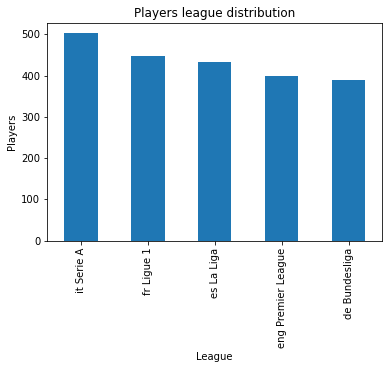

In [647]:

data = players_dist
data.plot(kind="bar")
plt.title("Players league distribution")
plt.xlabel("League")
plt.ylabel("Players")
plt.show()


In [681]:
df_players = df_all_merge.copy()

### Function for define player position 2

In [693]:
#'DF', 'MID', 'ATT', 'DEF', 'GK'
def define_position_2(pos):
    if (pos == "DF"):
        pos = "DEF"
        return pos
    elif (pos == "MID"):
        return pos
    elif (pos == "ATT"):
        return pos
    elif (pos == "DEF"):
        return pos
    elif (pos == "GK"):
        return pos

In [695]:
df_all_merge["pos"].unique()

array(['DEF', 'MID', 'ATT', 'GK'], dtype=object)

In [694]:
i=0
for row in df_all_merge["pos"]:
    position = define_position_2(df_all_merge["pos"][i])
    df_all_merge["pos"][i] = position
    i=i+1

C:\Users\PELEGL~1\AppData\Local\Temp/ipykernel_13576/2878682629.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_merge["pos"][i] = position


In [696]:
df_all_merge["pos"].unique()

array(['DEF', 'MID', 'ATT', 'GK'], dtype=object)

### Function to change value rows from K to M

In [697]:
# Function to substring price
def priceSubstring(value):
    value = value.replace('m','')
    value = value.replace('$','')
    return value


In [698]:
# Change players value by substring
i=0
for row in df_players["value"]:
    value = df_players["value"][i]
    new_value = priceSubstring(value)
    df_players["value"][i] = new_value
    i=i+1


C:\Users\PELEGL~1\AppData\Local\Temp/ipykernel_13576/2656539669.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_players["value"][i] = new_value


In [795]:
# list columns to change to float
cols_to_convert=[
'age',
'mp',
'mp_start',
'gls',
'ast',
'gls_no_pen',
'gls_pen',
'y_cards',
'r_cards',
'gls_90',
'ast_90',
'ex_gls',
'ex_ast',
'ex_gls_90',
'ex_ast_90',
'ex_gls_ast_no_pen_90',
'all_pass_dist_forward',
'ast_minus_ex_ast',
'long_pass_%',
'mid_pass_%',
'pass_completed_%',
'progressive_pass',
'short_pass_%',
'ex_gls_shots_no_pen',
'gls_minus_ex_gls',
'gls_shots',
'mp_90',
'pen_made',
'shots_90',
'shots_target_%',
'shots_target_90',
'att_pressure',
'blk',
'clearances',
'def_tackels',
'dribble_faced',
'dribble_miss_tackels',
'dribble_tackeld',
'dribble_tackeld_%',
'interceptions',
'mid_tackels',
'pass_blk',
'shot_blk',
'shot_save',
'tackels',
'total_mistakes',
'w_tackels',
'2y_cards',
'air_tackels_loss',
'air_tackels_won',
'air_tackels_won_%',
'born',
'dribble',
'dribble_completed',
'dribble_to_goal',
'earned_fouls',
'fouls_commited',
'offsides',
'own_gls',
'shot_created_90'
]


In [796]:
for col in cols_to_convert:
    df_players[col] = pd.to_numeric(df_players[col],errors='coerce').astype('float')

In [797]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2173 entries, 0 to 2172
Data columns (total 66 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   2173 non-null   object 
 1   nation                 2173 non-null   object 
 2   pos                    2173 non-null   object 
 3   team                   2173 non-null   object 
 4   league                 2173 non-null   object 
 5   age                    2173 non-null   float64
 6   mp                     2173 non-null   float64
 7   mp_start               2173 non-null   float64
 8   gls                    2173 non-null   float64
 9   ast                    2173 non-null   float64
 10  gls_no_pen             2173 non-null   float64
 11  gls_pen                2173 non-null   float64
 12  y_cards                2173 non-null   float64
 13  r_cards                2173 non-null   float64
 14  gls_90                 2173 non-null   float64
 15  ast_

In [798]:
df_players = df_players.sort_values(by=["value"],ascending=False)
df_players = df_players.reset_index(drop=True)

In [799]:
df_players[["name","mp","league","gls","ast","value"]]


name    mp              league   gls   ast    value
0         Erling Haaland  24.0       de Bundesliga  22.0   8.0  165.000
1        Vinicius Júnior  35.0          es La Liga  17.0  10.0  110.000
2             Phil Foden  28.0  eng Premier League   9.0   5.0   99.000
3             Harry Kane  37.0  eng Premier League  17.0   9.0   99.000
4          Mohamed Salah  35.0  eng Premier League  23.0  13.0   99.000
...                  ...   ...                 ...   ...   ...      ...
2168    Stephan Fürstner   1.0       de Bundesliga   0.0   0.0    0.083
2169      Ebenezer Annan   1.0          it Serie A   0.0   0.0    0.083
2170  Alessandro Berardi   1.0          it Serie A   0.0   0.0    0.055
2171     Davide Marfella   1.0          it Serie A   0.0   0.0    0.055
2172        Andrei Motoc   1.0          it Serie A   0.0   0.0    0.028

[2173 rows x 6 columns]

In [849]:
df_players_bck = df_players.copy()

In [867]:
df_players

name   nation  pos             team              league  \
0         Erling Haaland   no NOR  ATT         Dortmund       de Bundesliga   
1        Vinicius Júnior   br BRA  ATT      Real Madrid          es La Liga   
2             Phil Foden  eng ENG  ATT  Manchester City  eng Premier League   
3             Harry Kane  eng ENG  ATT        Tottenham  eng Premier League   
4          Mohamed Salah   eg EGY  ATT        Liverpool  eng Premier League   
...                  ...      ...  ...              ...                 ...   
2168    Stephan Fürstner   de GER  MID         Mainz 05       de Bundesliga   
2169      Ebenezer Annan   gh GHA  DEF          Bologna          it Serie A   
2170  Alessandro Berardi   it ITA   GK    Hellas Verona          it Serie A   
2171     Davide Marfella   it ITA   GK           Napoli          it Serie A   
2172        Andrei Motoc   ro ROU  DEF      Salernitana          it Serie A   

       age    mp  mp_start   gls   ast  ...  air_tackels_won_%    born  \
0     21.0  24.0      21.0  22.0   8.0  ...               54.9  2000.0   
1     21.0  35.0      30.0  17.0  10.0  ...               17.4  2000.0   
2     21.0  28.0      24.0   9.0   5.0  ...               19.5  2000.0   
3     28.0  37.0      36.0  17.0   9.0  ...               47.3  1993.0   
4     29.0  35.0      30.0  23.0  13.0  ...               22.0  1992.0   
...    ...   ...       ...   ...   ...  ...                ...     ...   
2168  33.0   1.0       0.0   0.0   0.0  ...                NaN  1987.0   
2169  18.0   1.0       0.0   0.0   0.0  ...                NaN  2002.0   
2170  30.0   1.0       1.0   0.0   0.0  ...                NaN  1991.0   
2171  21.0   1.0       0.0   0.0   0.0  ...                NaN  1999.0   
2172  19.0   1.0       1.0   0.0   0.0  ...                0.0  2002.0   

      dribble  dribble_completed  dribble_to_goal  earned_fouls  \
0         8.0                4.0              2.0          17.0   
1        59.0               21.0              3.0          82.0   
2        59.0                3.0              0.0          38.0   
3        40.0               10.0              1.0          70.0   
4        51.0               21.0              5.0          30.0   
...       ...                ...              ...           ...   
2168      0.0                0.0              0.0           0.0   
2169      0.0                0.0              0.0           0.0   
2170      0.0                0.0              0.0           0.0   
2171      0.0                0.0              0.0           0.0   
2172      0.0                0.0              0.0           2.0   

      fouls_commited  offsides  own_gls  shot_created_90  
0               17.0      14.0      0.0             2.59  
1               42.0      26.0      0.0             5.69  
2               17.0      13.0      0.0             3.51  
3               46.0      17.0      0.0             3.26  
4               13.0      12.0      0.0             4.33  
...              ...       ...      ...              ...  
2168             0.0       0.0      0.0             0.00  
2169             0.0       0.0      0.0             0.00  
2170             0.0       0.0      0.0             0.00  
2171             0.0       0.0      0.0             0.00  
2172             0.0       0.0      0.0             0.00  

[2173 rows x 66 columns]

### Create New DataFrame by Player Position

In [1466]:
# Create 4 Dataframe by player position (GK,DEF,MID,ATT)
df_GK = df_players.copy()
df_DEF = df_players.copy()
df_MID = df_players.copy()
df_ATT = df_players.copy()

df_GK = df_GK[df_GK.pos == "GK"]
df_DEF = df_DEF[df_DEF.pos == "DEF"]
df_MID = df_MID[df_MID.pos == "MID"]
df_ATT = df_ATT[df_ATT.pos == "ATT"]

# Sort all dataframe by value
df_GK = df_GK.sort_values(by=["value"],ascending=False)
df_DEF = df_DEF.sort_values(by=["value"],ascending=False)
df_MID = df_MID.sort_values(by=["value"],ascending=False)
df_ATT = df_ATT.sort_values(by=["value"],ascending=False)

# Reset all dataframe index
df_GK = df_GK.reset_index(drop=True)
df_DEF = df_DEF.reset_index(drop=True)
df_MID = df_MID.reset_index(drop=True)
df_ATT = df_ATT.reset_index(drop=True)

In [1467]:
# remove unnecessary from each dataframe
df_ATT = df_ATT.drop(columns=["gls","ast","all_pass_dist_forward","gls_shots","mp","dribble_faced","ex_gls","ex_ast",
                              "dribble_miss_tackels","shot_blk","shot_save","dribble_tackeld_%",
                              "w_tackels","own_gls","fouls_commited","born","mp_start","gls_no_pen","gls_pen",
                              "ex_gls_shots_no_pen","dribble"])

In [1468]:
df_ATT.shape

(676, 45)

In [1469]:
df_MID = df_MID.drop(columns=["mp","gls","ast","ex_gls","ex_ast","gls_no_pen","ex_gls_shots_no_pen",
                             "gls_shots","dribble_faced","dribble_tackeld","born","dribble"])

In [1470]:
df_MID.shape

(546, 54)

In [1471]:
df_DEF = df_DEF.drop(columns=["mp","gls","ast","gls_no_pen","ex_gls","ex_ast","ex_gls_shots_no_pen",
                             "gls_shots","born","dribble"])

In [1472]:
df_DEF.shape

(761, 56)

# Exploratory Data Analyis

#### Top 10 valuable players

In [1199]:
df_players[["name","age","pos","team","value"]].head(10)

name   age  pos             team  value
0          Erling Haaland  21.0  ATT         Dortmund  165.0
1         Vinicius Júnior  21.0  ATT      Real Madrid  110.0
2              Phil Foden  21.0  ATT  Manchester City   99.0
3              Harry Kane  28.0  ATT        Tottenham   99.0
4           Mohamed Salah  29.0  ATT        Liverpool   99.0
5         Kevin De Bruyne  30.0  MID  Manchester City   93.5
6          Dušan Vlahović  21.0  ATT         Juventus   93.5
7  Trent Alexander-Arnold  22.0  DEF        Liverpool   88.0
8             Declan Rice  22.0  MID         West Ham   88.0
9         Jude Bellingham  18.0  MID         Dortmund   88.0

#### Top 5 valuable ATT players

In [1201]:
df_ATT[["name","age","pos","team","value"]].head(5)

name   age  pos             team  value
0   Erling Haaland  21.0  ATT         Dortmund  165.0
1  Vinicius Júnior  21.0  ATT      Real Madrid  110.0
2       Phil Foden  21.0  ATT  Manchester City   99.0
3       Harry Kane  28.0  ATT        Tottenham   99.0
4    Mohamed Salah  29.0  ATT        Liverpool   99.0

#### Top 5 valuable MID players

In [1202]:
df_MID[["name","age","pos","team","value"]].head(5)

name   age  pos             team  value
0          Kevin De Bruyne  30.0  MID  Manchester City   93.5
1           Joshua Kimmich  26.0  MID    Bayern Munich   88.0
2              Declan Rice  22.0  MID         West Ham   88.0
3          Jude Bellingham  18.0  MID         Dortmund   88.0
4  Sergej Milinković-Savić  26.0  MID            Lazio   77.0

#### Top 5 valuable DEF players

In [1203]:
df_DEF[["name","age","pos","team","value"]].head(5)

name   age  pos             team  value
0  Trent Alexander-Arnold  22.0  DEF        Liverpool   88.0
1              Rúben Dias  24.0  DEF  Manchester City   82.5
2        Matthijs de Ligt  21.0  DEF         Juventus   77.0
3         Alphonso Davies  20.0  DEF    Bayern Munich   77.0
4            João Cancelo  27.0  DEF  Manchester City   71.5

#### Mean players value based on position

In [1208]:
pd.DataFrame(df_players.groupby("pos").value.mean())

value
pos           
ATT  12.988299
DEF   9.713536
GK    5.786289
MID  10.540108

#### Top 5 Teams by player value (mean) 

In [1211]:
pd.DataFrame(df_players.groupby(["team", "league"]).value.mean().sort_values(ascending=False).head(5))

value
team            league                       
Manchester City eng Premier League  42.156190
Chelsea         eng Premier League  35.893478
Liverpool       eng Premier League  34.342000
Bayern Munich   de Bundesliga       32.153846
Atlético Madrid es La Liga          31.900000

#### Top 5 Teams by total players value

In [1213]:
pd.DataFrame(df_players.groupby("team").value.sum().sort_values(ascending=False).head(5))

value
team                   
Manchester City  885.28
Liverpool        858.55
Bayern Munich    836.00
Chelsea          825.55
Real Madrid      691.02

#### Players distribution by age

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

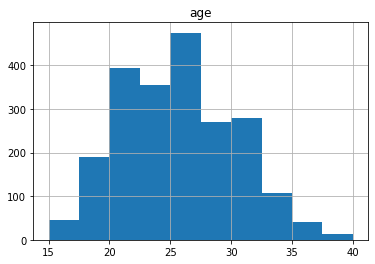

In [1218]:
df_players.hist(column="age")

#### Players distribution by age and value

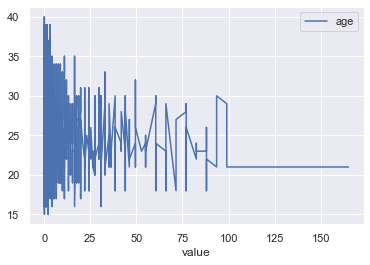

In [1305]:
df_players.plot(x="value",y="age")
plt.show()

#### Players distribution by position

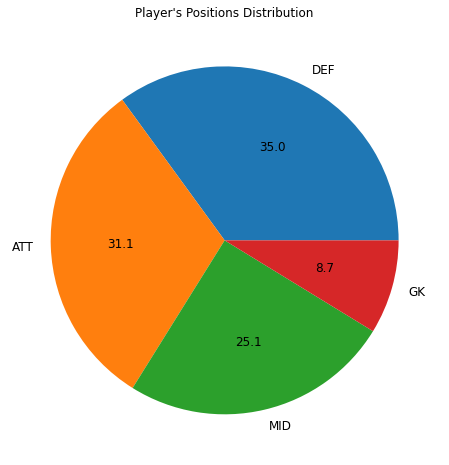

In [1224]:
plt.figure(figsize=(8,8))
loc=df_players.pos.value_counts()
loc.plot(kind='pie' ,autopct='%.1f',fontsize=12,subplots=True)
plt.title("Player's Positions Distribution")
plt.ylabel("")
plt.show()

#### Players value by age

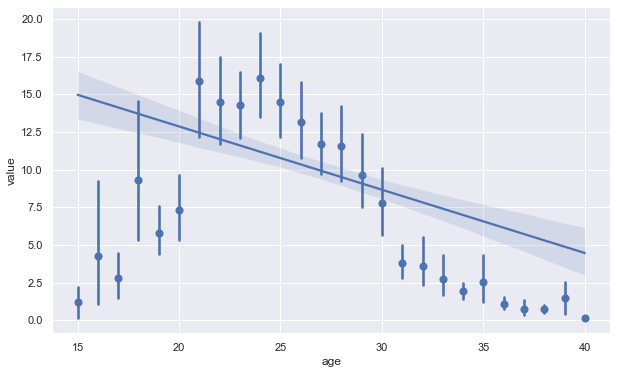

In [1228]:
sns.set_theme(color_codes=False)
plt.figure(figsize=(10,6))
sns.regplot(x="age",y="value",data=df_players, x_estimator=np.mean)
plt.show()

### Dataframes (ATT, MID, DEF) Describe

In [1216]:
df_ATT.describe()

age     y_cards     r_cards      gls_90      ast_90   ex_gls_90  \
count  676.000000  676.000000  676.000000  676.000000  676.000000  676.000000   
mean    24.671598    2.202663    0.090237    0.252101    0.161095    0.289098   
std      4.585177    2.280752    0.306704    0.283125    0.711026    0.308703   
min     15.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     21.000000    0.000000    0.000000    0.000000    0.000000    0.140000   
50%     24.000000    2.000000    0.000000    0.200000    0.100000    0.250000   
75%     28.000000    3.000000    0.000000    0.380000    0.210000    0.370000   
max     39.000000   12.000000    2.000000    3.330000   18.000000    4.480000   

        ex_ast_90  ex_gls_ast_no_pen_90       value  ast_minus_ex_ast  ...  \
count  676.000000            676.000000  676.000000        676.000000  ...   
mean     0.144882              0.411908   12.988299          0.099556  ...   
std      0.269526              0.394940   18.768253          1.328597  ...   
min      0.000000              0.000000    0.110000         -3.800000  ...   
25%      0.070000              0.250000    2.200000         -0.500000  ...   
50%      0.120000              0.370000    5.500000          0.000000  ...   
75%      0.180000              0.500000   17.600000          0.600000  ...   
max      6.520000              6.520000  165.000000          6.000000  ...   

       total_mistakes    2y_cards  air_tackels_loss  air_tackels_won  \
count      676.000000  676.000000        676.000000       676.000000   
mean         0.050296    0.035503         32.871302        21.343195   
std          0.225388    0.185184         31.901418        27.525137   
min          0.000000    0.000000          0.000000         0.000000   
25%          0.000000    0.000000          9.000000         4.000000   
50%          0.000000    0.000000         25.000000        12.000000   
75%          0.000000    0.000000         46.000000        26.000000   
max          2.000000    1.000000        225.000000       251.000000   

       air_tackels_won_%  dribble_completed  dribble_to_goal  earned_fouls  \
count         653.000000         676.000000       676.000000    676.000000   
mean           35.787443           2.806213         0.402367     22.840237   
std            16.484353           3.492556         0.793078     20.625649   
min             0.000000           0.000000         0.000000      0.000000   
25%            26.300000           0.000000         0.000000      6.000000   
50%            36.000000           2.000000         0.000000     18.000000   
75%            44.400000           4.000000         1.000000     34.000000   
max           100.000000          24.000000         5.000000    124.000000   

         offsides  shot_created_90  
count  676.000000       676.000000  
mean     5.698225         2.727115  
std      6.375467         2.120998  
min      0.000000         0.000000  
25%      1.000000         1.847500  
50%      4.000000         2.480000  
75%      9.000000         3.315000  
max     41.000000        36.000000  

[8 rows x 40 columns]

In [1163]:
df_MID.describe()

age    mp_start     gls_pen     y_cards     r_cards     gls_90  \
count  546.000000  546.000000  546.000000  546.000000  546.000000  546.00000   
mean    25.230769   15.300366    0.120879    3.683150    0.150183    0.07544   
std      4.597351   11.049077    0.638263    3.118511    0.405659    0.12098   
min     15.000000    0.000000    0.000000    0.000000    0.000000    0.00000   
25%     22.000000    5.000000    0.000000    1.000000    0.000000    0.00000   
50%     25.000000   15.000000    0.000000    3.000000    0.000000    0.03000   
75%     29.000000   25.000000    0.000000    5.000000    0.000000    0.11000   
max     37.000000   38.000000    7.000000   14.000000    3.000000    1.50000   

           ast_90   ex_gls_90   ex_ast_90  ex_gls_ast_no_pen_90  ...  \
count  546.000000  546.000000  546.000000            546.000000  ...   
mean     0.076245    0.092326    0.095183              0.182399  ...   
std      0.123187    0.223642    0.258103              0.454040  ...   
min      0.000000    0.000000    0.000000              0.000000  ...   
25%      0.000000    0.030000    0.020000              0.060000  ...   
50%      0.040000    0.060000    0.060000              0.130000  ...   
75%      0.117500    0.110000    0.110000              0.210000  ...   
max      1.700000    4.700000    4.920000              9.630000  ...   

       air_tackels_loss  air_tackels_won  air_tackels_won_%  \
count        546.000000       546.000000         521.000000   
mean          20.809524        21.172161          46.251440   
std           18.383189        23.185246          17.172994   
min            0.000000         0.000000           0.000000   
25%            8.000000         6.000000          38.000000   
50%           17.000000        15.000000          47.800000   
75%           29.000000        29.000000          56.800000   
max          157.000000       192.000000         100.000000   

       dribble_completed  dribble_to_goal  earned_fouls  fouls_commited  \
count         546.000000       546.000000    546.000000      546.000000   
mean            1.173993         0.122711     22.360806       24.983516   
std             1.954750         0.380194     19.767266       18.727248   
min             0.000000         0.000000      0.000000        0.000000   
25%             0.000000         0.000000      7.000000        9.000000   
50%             0.000000         0.000000     19.000000       22.000000   
75%             2.000000         0.000000     32.000000       37.000000   
max            22.000000         3.000000    117.000000       91.000000   

         offsides     own_gls  shot_created_90  
count  546.000000  546.000000       546.000000  
mean     0.893773    0.036630         2.089231  
std      1.685251    0.206622         1.817912  
min      0.000000    0.000000         0.000000  
25%      0.000000    0.000000         1.182500  
50%      0.000000    0.000000         1.860000  
75%      1.000000    0.000000         2.670000  
max     13.000000    2.000000        25.710000  

[8 rows x 49 columns]

In [1164]:
df_DEF.describe()

age    mp_start     gls_pen     y_cards     r_cards      gls_90  \
count  761.000000  761.000000  761.000000  761.000000  761.000000  761.000000   
mean    25.459921   16.825230    0.021025    3.378449    0.176084    0.047424   
std      4.326027   10.963441    0.265725    2.901226    0.429817    0.097018   
min     16.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     22.000000    7.000000    0.000000    1.000000    0.000000    0.000000   
50%     25.000000   17.000000    0.000000    3.000000    0.000000    0.000000   
75%     29.000000   26.000000    0.000000    5.000000    0.000000    0.070000   
max     38.000000   38.000000    6.000000   16.000000    3.000000    1.340000   

           ast_90   ex_gls_90   ex_ast_90  ex_gls_ast_no_pen_90  ...  \
count  761.000000  761.000000  761.000000            761.000000  ...   
mean     0.066518    0.054442    0.070933              0.124652  ...   
std      0.414848    0.105516    0.282454              0.300206  ...   
min      0.000000    0.000000    0.000000              0.000000  ...   
25%      0.000000    0.020000    0.010000              0.040000  ...   
50%      0.000000    0.040000    0.030000              0.080000  ...   
75%      0.080000    0.060000    0.080000              0.140000  ...   
max     11.250000    2.160000    6.500000              6.500000  ...   

       air_tackels_loss  air_tackels_won  air_tackels_won_%  \
count        761.000000       761.000000         742.000000   
mean          23.959264        34.052562          55.262938   
std           18.268096        30.800032          16.593508   
min            0.000000         0.000000           0.000000   
25%            9.000000        10.000000          46.825000   
50%           21.000000        26.000000          57.100000   
75%           36.000000        51.000000          65.650000   
max          135.000000       171.000000         100.000000   

       dribble_completed  dribble_to_goal  earned_fouls  fouls_commited  \
count         761.000000       761.000000    761.000000      761.000000   
mean            0.671485         0.064389     14.562418       18.927727   
std             1.304784         0.280612     13.360059       13.524492   
min             0.000000         0.000000      0.000000        0.000000   
25%             0.000000         0.000000      5.000000        8.000000   
50%             0.000000         0.000000     11.000000       17.000000   
75%             1.000000         0.000000     21.000000       28.000000   
max             8.000000         2.000000     91.000000       71.000000   

         offsides     own_gls  shot_created_90  
count  761.000000  761.000000       761.000000  
mean     1.162943    0.122208         1.363022  
std      2.108190    0.354732         3.554496  
min      0.000000    0.000000         0.000000  
25%      0.000000    0.000000         0.440000  
50%      0.000000    0.000000         0.920000  
75%      1.000000    0.000000         1.640000  
max     21.000000    2.000000        90.000000  

[8 rows x 51 columns]

In [1167]:
df_ATT[["name", "team","value"]].head(5), df_MID[["name", "team","value"]].head(5),df_DEF[["name", "team","value"]].head(5)

(              name             team  value
 0   Erling Haaland         Dortmund  165.0
 1  Vinicius Júnior      Real Madrid  110.0
 2       Phil Foden  Manchester City   99.0
 3       Harry Kane        Tottenham   99.0
 4    Mohamed Salah        Liverpool   99.0,
                       name             team  value
 0          Kevin De Bruyne  Manchester City   93.5
 1           Joshua Kimmich    Bayern Munich   88.0
 2              Declan Rice         West Ham   88.0
 3          Jude Bellingham         Dortmund   88.0
 4  Sergej Milinković-Savić            Lazio   77.0,
                      name             team  value
 0  Trent Alexander-Arnold        Liverpool   88.0
 1              Rúben Dias  Manchester City   82.5
 2        Matthijs de Ligt         Juventus   77.0
 3         Alphonso Davies    Bayern Munich   77.0
 4            João Cancelo  Manchester City   71.5)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='shots_target_%', ylabel='value'>

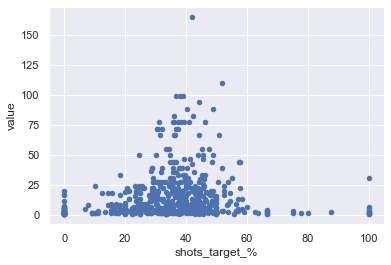

In [1310]:
df_ATT.plot(x="shots_target_%", y="value" ,kind="scatter")

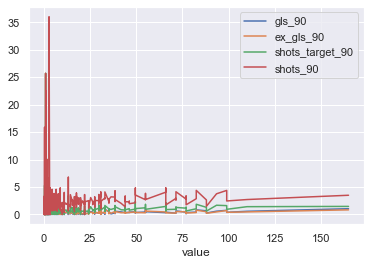

In [1257]:

df_ATT.plot(x="value",y=["gls_90","ex_gls_90","shots_target_90","shots_90"])
plt.show()

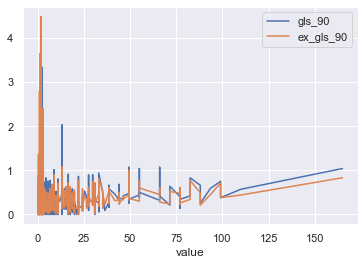

In [1267]:
# ATT Plot gls_90 & ex_gls_90
df_ATT.plot(x="value",y=["gls_90","ex_gls_90"])
plt.show()

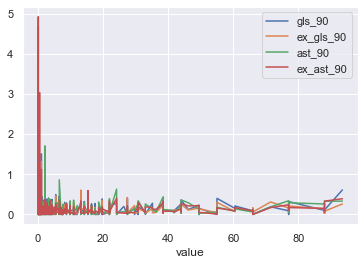

In [1266]:
# MID Plot gls_90 & ex_gls_90
df_MID.plot(x="value",y=["gls_90","ex_gls_90","ast_90","ex_ast_90"])
plt.show()

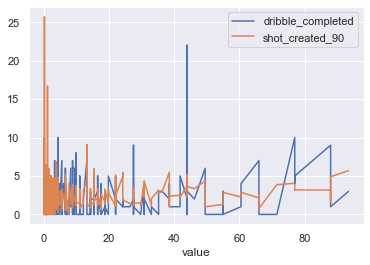

In [1280]:
# MID dribble and shot created
df_MID.plot(x="value",y=["dribble_completed","shot_created_90"])
plt.show()

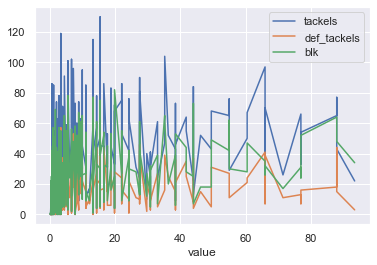

In [1303]:
# ATT Plot gls_90 & ex_gls_90
df_MID.plot(x="value",y=["tackels","def_tackels","blk"])
plt.show()

## Heatmaps

#### ATT Dataframe Heatmap

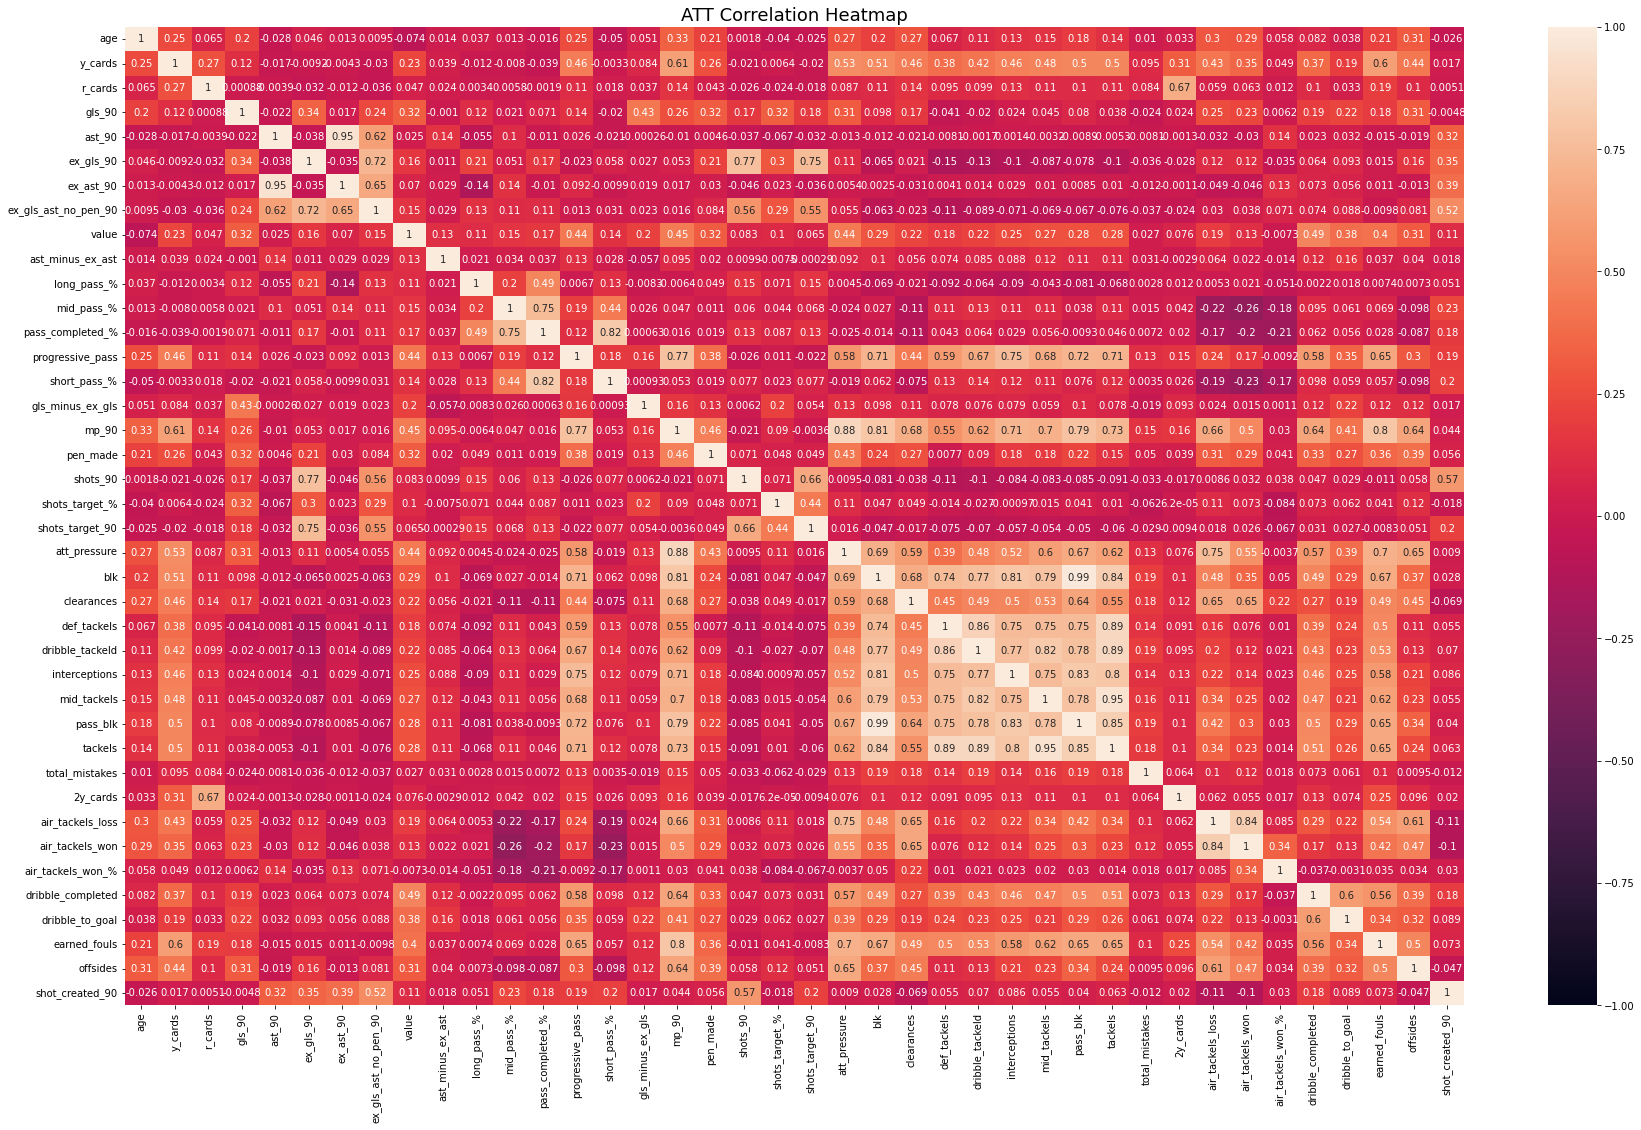

In [1173]:
#ATT Heatmap

plt.figure(figsize=(30,18))
heatmap = sns.heatmap(df_ATT.corr(), vmin=-1, vmax=1, annot=True )
heatmap.set_title("ATT Correlation Heatmap", fontdict={"fontsize":18});

#### MID Dataframe Heatmap

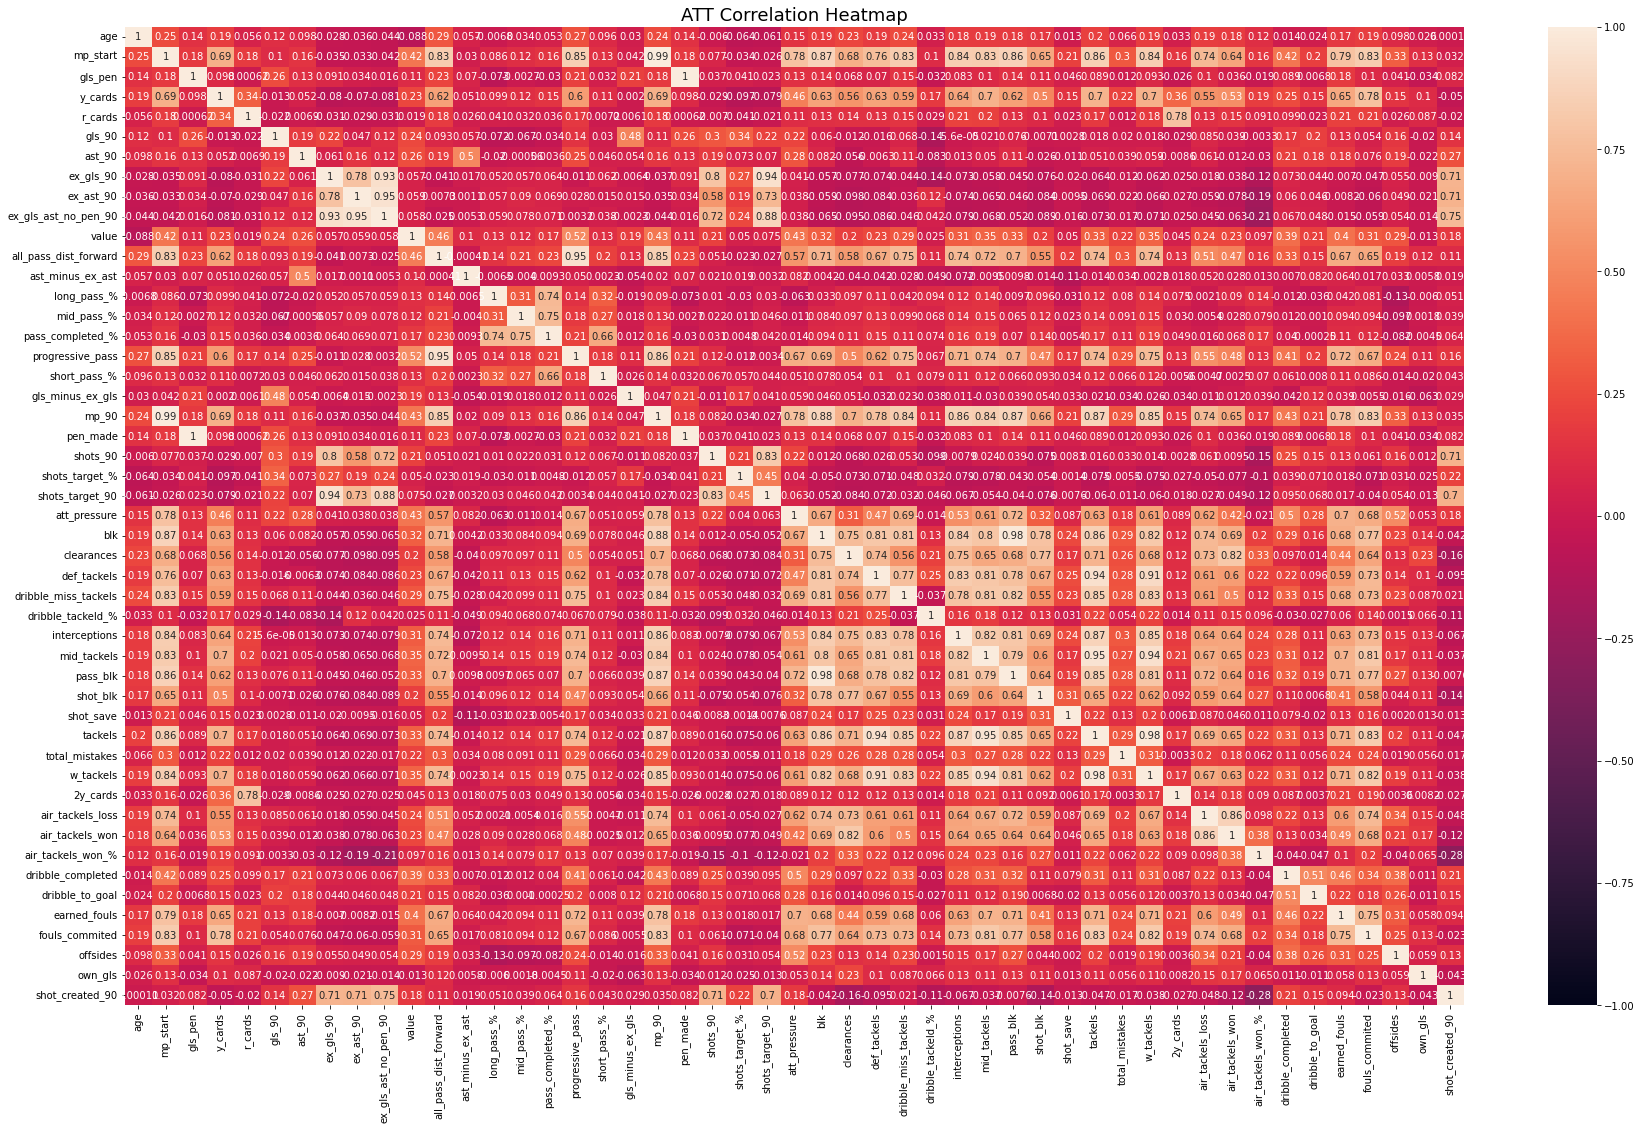

In [1174]:
#MID Heatmap

plt.figure(figsize=(30,18))
heatmap = sns.heatmap(df_MID.corr(), vmin=-1, vmax=1, annot=True )
heatmap.set_title("ATT Correlation Heatmap", fontdict={"fontsize":18});

#### DEF Dataframe Heatmap

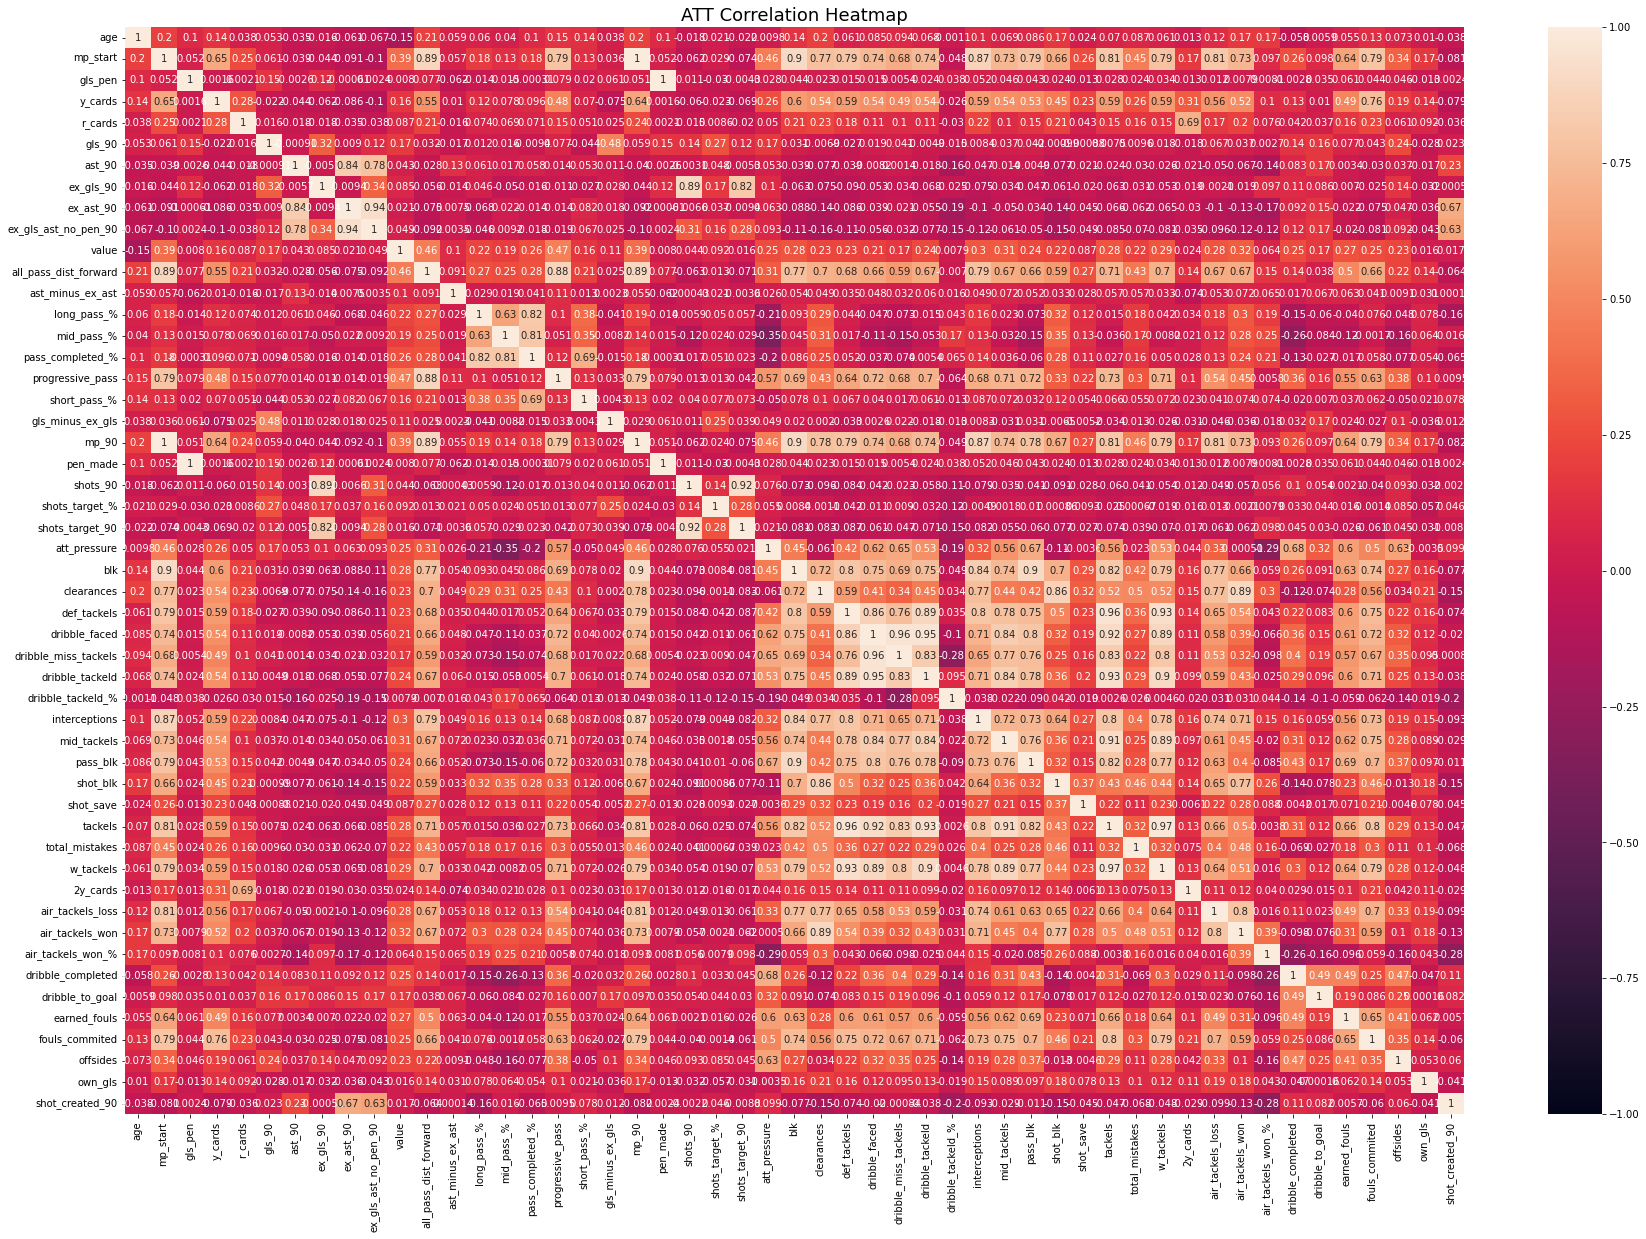

In [1177]:
# DEF Heatmap

plt.figure(figsize=(30,20))
heatmap = sns.heatmap(df_DEF.corr(), vmin=-1, vmax=1, annot=True )
heatmap.set_title("ATT Correlation Heatmap", fontdict={"fontsize":18});

# Correlation

#### ATT Correlation

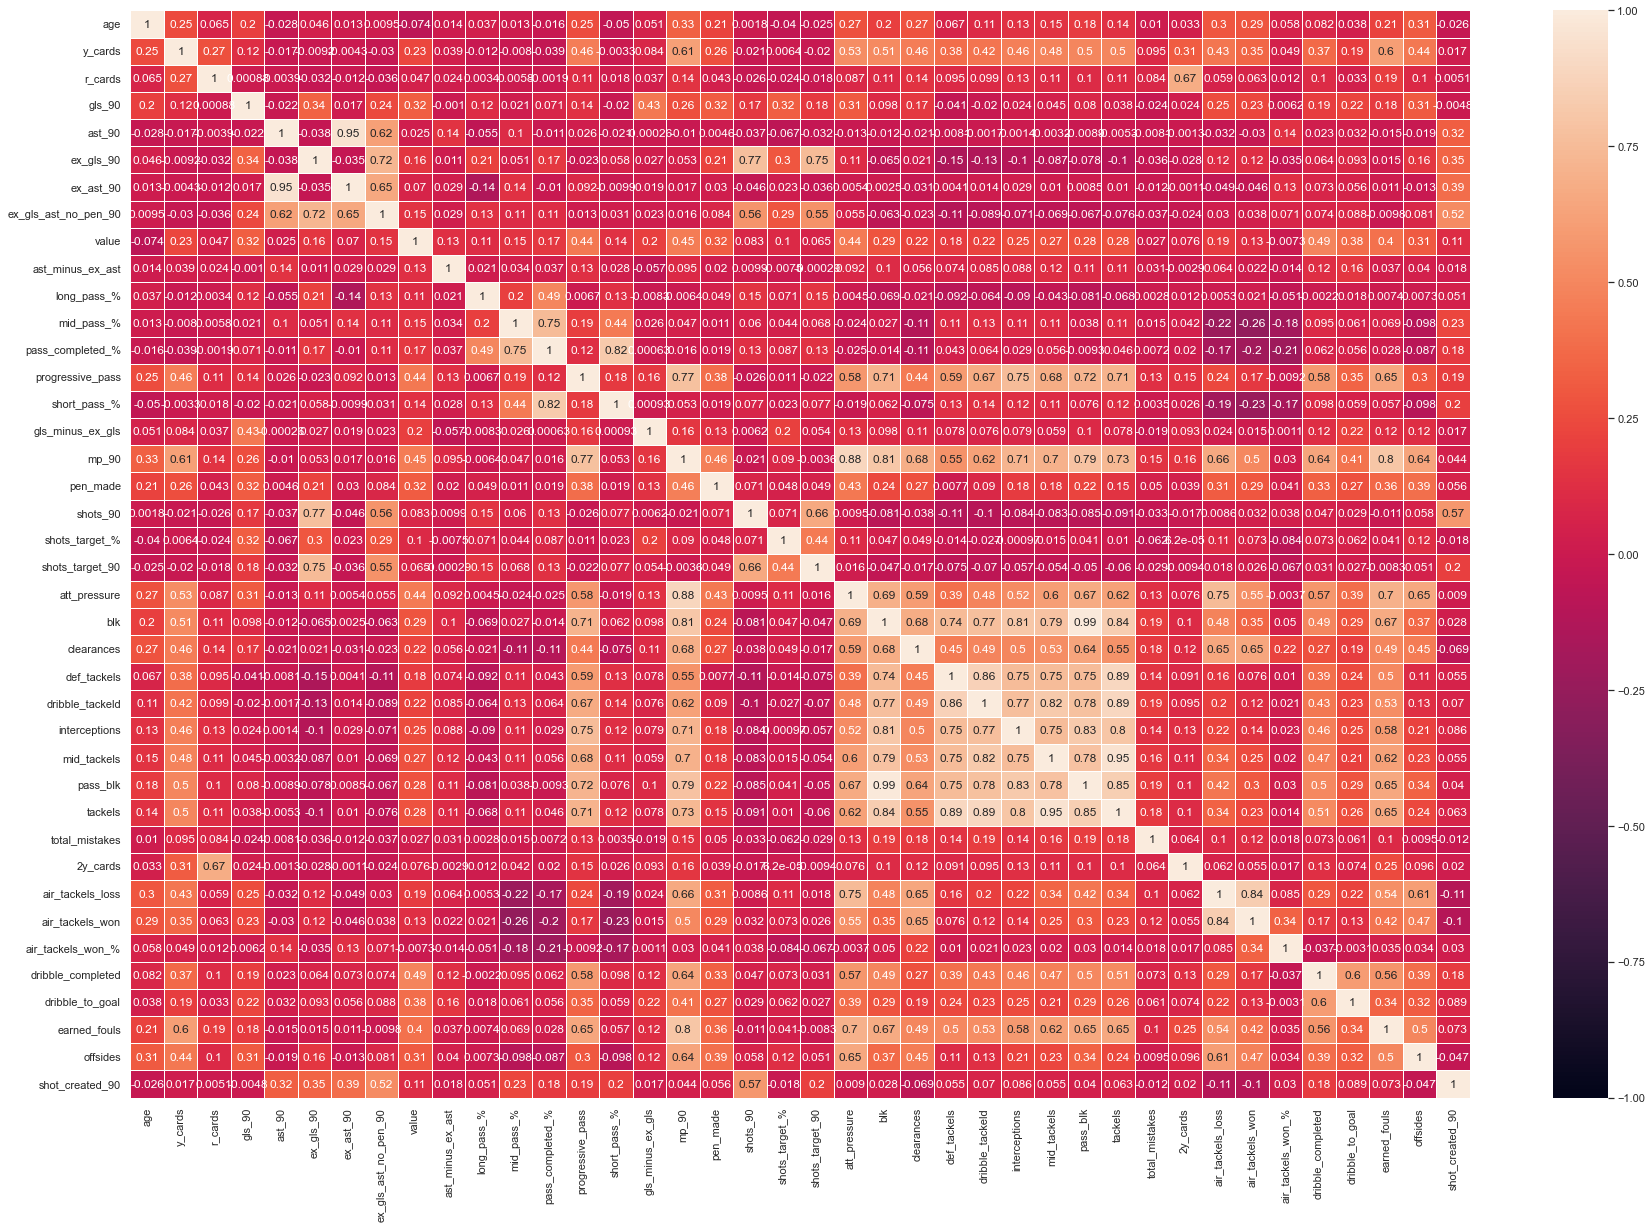

In [1314]:
plt.figure(figsize=(30,20))
sns.heatmap(df_ATT.corr(),vmin=-1,vmax=1,linewidths=.5, annot=True );
#plt.yticks(rotation=360)
plt.show()

#### MID Correlation

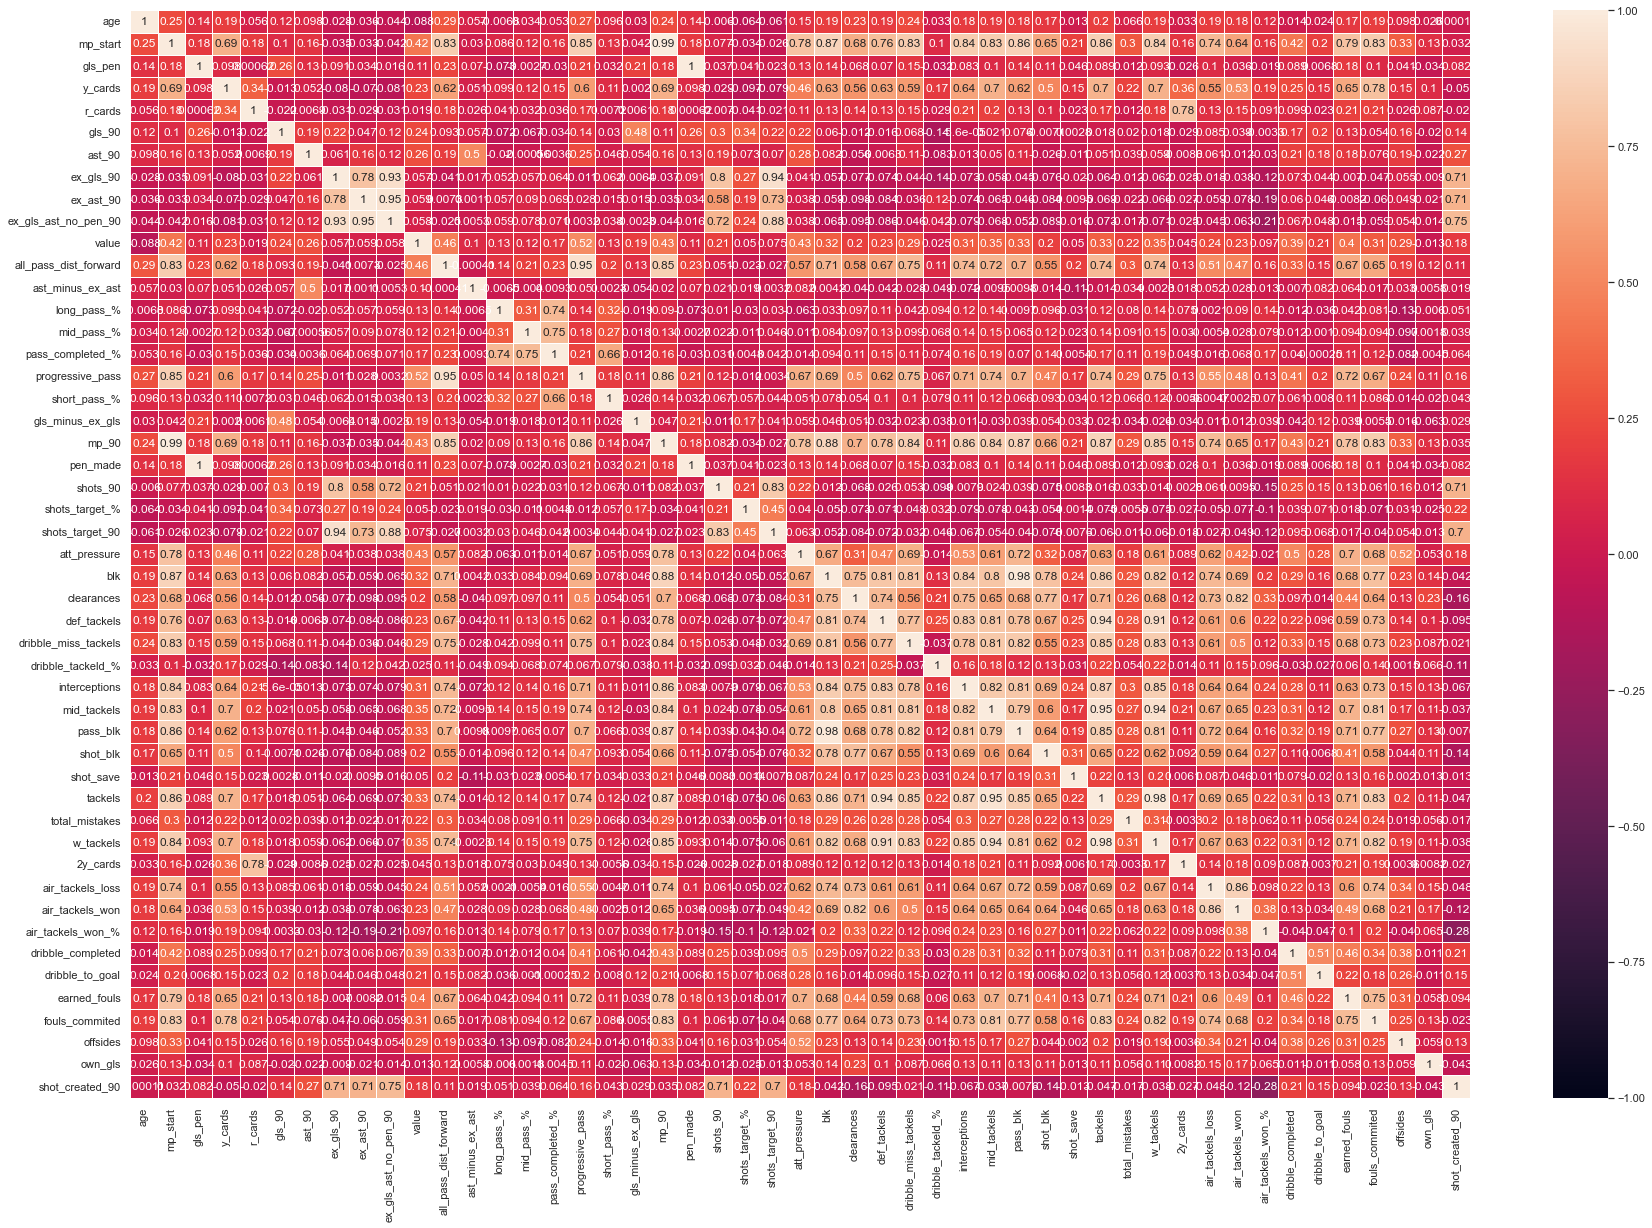

In [1315]:
plt.figure(figsize=(30,20))
sns.heatmap(df_MID.corr(),vmin=-1,vmax=1,linewidths=.5, annot=True );
#plt.yticks(rotation=360)
plt.show()

#### DEF Correlation

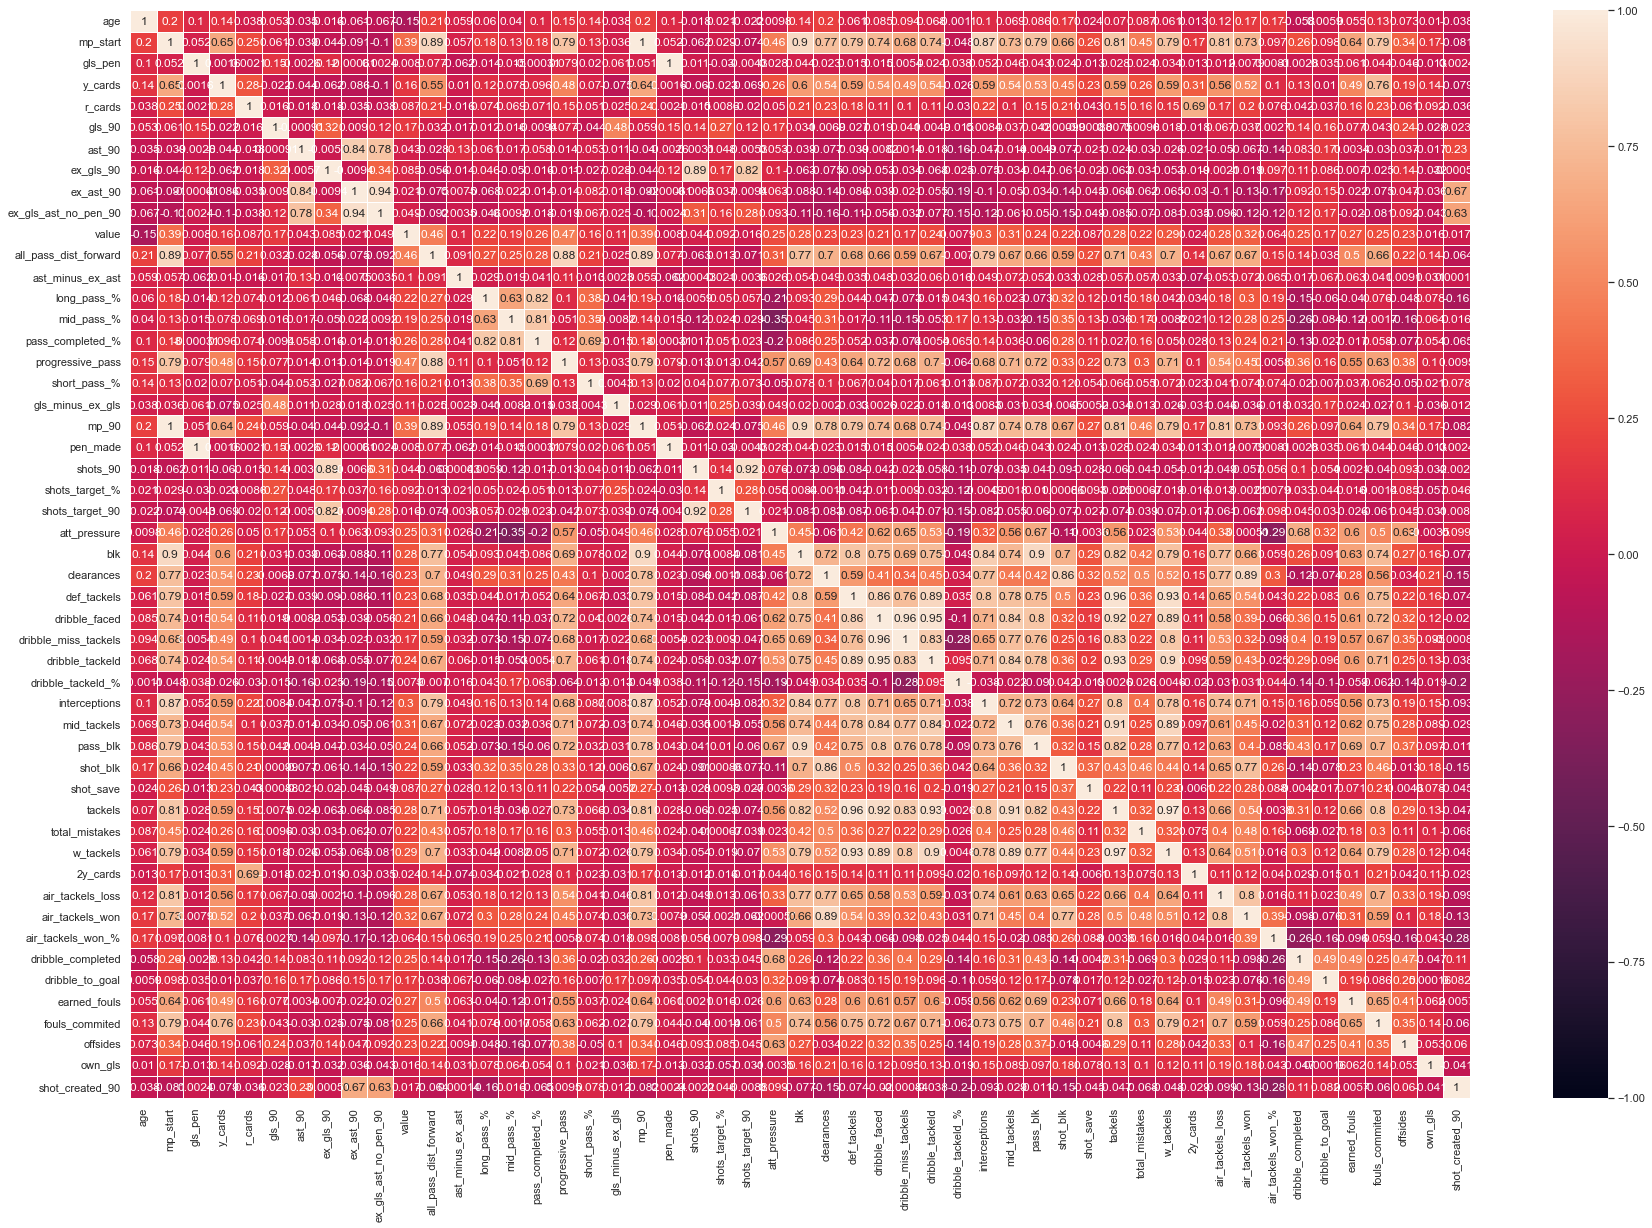

In [1316]:
plt.figure(figsize=(30,20))
sns.heatmap(df_DEF.corr(),vmin=-1,vmax=1,linewidths=.5, annot=True );
#plt.yticks(rotation=360)
plt.show()

In [1317]:
# Export ATT, MID, DEF Dataframes for Backup

# Export correlatio table to csv
path = "C:\Python_Projects\CSV"
filename = "df_ATT"
export_csv(df_ATT,path,filename)

# Export correlatio table to csv
path = "C:\Python_Projects\CSV"
filename = "df_MID"
export_csv(df_MID,path,filename)

# Export correlatio table to csv
path = "C:\Python_Projects\CSV"
filename = "df_DEF"
export_csv(df_DEF,path,filename)

In [806]:
df_corr = df_players.corr()

In [807]:
# Export correlatio table to csv
path = "C:\Python_Projects\CSV"
filename = "df_corr"
export_csv(df_corr,path,filename)

## ATT Value Prediction

In [1546]:
df_ATT_learn = df_ATT.copy()

In [1547]:
df_ATT_learn.columns

Index(['name', 'nation', 'pos', 'team', 'league', 'age', 'y_cards', 'r_cards',
       'gls_90', 'ast_90', 'ex_gls_90', 'ex_ast_90', 'ex_gls_ast_no_pen_90',
       'value', 'ast_minus_ex_ast', 'long_pass_%', 'mid_pass_%',
       'pass_completed_%', 'progressive_pass', 'short_pass_%',
       'gls_minus_ex_gls', 'mp_90', 'pen_made', 'shots_90', 'shots_target_%',
       'shots_target_90', 'att_pressure', 'blk', 'clearances', 'def_tackels',
       'dribble_tackeld', 'interceptions', 'mid_tackels', 'pass_blk',
       'tackels', 'total_mistakes', '2y_cards', 'air_tackels_loss',
       'air_tackels_won', 'air_tackels_won_%', 'dribble_completed',
       'dribble_to_goal', 'earned_fouls', 'offsides', 'shot_created_90'],
      dtype='object')

In [1548]:
# Drop not numeric columns
df_ATT_learn = df_ATT_learn.drop(columns=["name","nation","pos","team","league"])

In [1549]:
# For linear regression the data can't have NaN values !!
df_ATT_learn = df_ATT_learn.dropna()
print(df_ATT_learn.shape)

(616, 40)


In [1593]:
TRAINING_FEATURES_ATT = df_ATT_learn.columns[df_ATT_learn.columns != "value"]
TARGET_FEATURE_ATT = "value"

X = df_ATT_learn[TRAINING_FEATURES_ATT]
y = df_ATT_learn[TARGET_FEATURE_ATT]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(523, 39) (523,)
(93, 39) (93,)


In [1594]:
# train our model
lin_reg_ATT = linear_model.LinearRegression()
lin_reg_model_ATT = lin_reg_ATT.fit(X_train, y_train)
lin_reg_predict_ATT = lin_reg_ATT.predict(X_test)


In [1595]:
lin_reg_predict_ATT

array([  9.16846808,  14.05253798,  13.56061326,  11.89237159,
        45.74983399,  10.14806937,  -5.01500465,  20.4460499 ,
         8.20956592,   1.14493127,  25.44299794,  17.48361889,
        33.7937492 ,  21.01507098,  20.1685458 ,  15.84907536,
        19.26894559,  10.58974906,  13.48942501,  21.95271694,
         5.45334671,   6.20187566,   6.19050485,   6.80658242,
        -2.87244425,   2.48622091,  20.02191575,   9.21999697,
        11.07605871,  -4.0502088 ,  23.60615383,   3.25922493,
        34.43031683,   0.32195009,  25.1025851 ,  30.0225288 ,
        15.8798913 ,  17.45430388,   3.00688135,   2.88995163,
        19.59576619,  21.9163746 ,  14.52399574,  13.20076378,
        -4.24544813,   2.74907739,  30.88727267,  13.32373144,
        15.22295949,  22.28144114,  69.55499689,  13.40107099,
        31.78209479,   5.95702914,  25.42057748,   8.56682115,
        35.55624494,  -6.95955365,  32.99047951,   9.82742681,
       -13.56159017,  22.04072642,  21.20536135,  11.96

In [1596]:
print("Score: ", lin_reg_model_ATT.score(X_test, y_test))

Score:  0.5113984280801751


In [1500]:
pd_diff_ATT = pd.DataFrame(X_test)
pd_diff_ATT["value"] = y_test
pd_diff_ATT["predicted_value"] = lin_reg_predict_ATT
pd_diff_ATT = pd_diff_ATT.reset_index()

In [1502]:
pd_diff_ATT[["value","predicted_value"]]

value  predicted_value
0     3.85         5.389112
1     1.54         2.027912
2     8.80        18.468805
3    77.00        49.620604
4     1.32         7.963421
..     ...              ...
149   9.90         7.102033
150   2.20        -4.890108
151   2.20        12.189019
152  27.50        29.479843
153   2.75         8.987917

[154 rows x 2 columns]

## MID Value Prediction

In [1508]:
df_MID_learn = df_MID.copy()

In [1509]:
# Drop not numeric columns
df_MID_learn = df_MID_learn.drop(columns=["name","nation","pos","team","league"])

In [1510]:
# For linear regression the data can't have NaN values !!
df_MID_learn = df_MID_learn.dropna()
print(df_MID_learn.shape)

(484, 49)


In [1526]:
TRAINING_FEATURES_MID = df_MID_learn.columns[df_MID_learn.columns != "value"]
TARGET_FEATURE_MID = "value"

X = df_MID_learn[TRAINING_FEATURES_MID]
y = df_MID_learn[TARGET_FEATURE_MID]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(338, 48) (338,)
(146, 48) (146,)


In [1527]:
# train our model
lin_reg_MID = linear_model.LinearRegression()
lin_reg_model_MID = lin_reg_MID.fit(X_train, y_train)
lin_reg_predict_MID = lin_reg_MID.predict(X_test)

In [1528]:
lin_reg_predict_MID

array([ 12.64792362,  38.72239958,  28.55077392,  -8.60018675,
         5.79650799,  35.50079393,   5.60894114,   5.73027594,
         4.0290291 ,   8.1084347 ,  10.59838121,  -2.34900993,
        24.06908975,   0.36838757,  -5.49654012,   9.52053339,
         9.82457899,   9.00766857,   9.99327089,  -8.29468775,
        -4.12887496,  18.58161738,  12.66803937,  11.80589887,
        -1.5720129 ,  17.24839419,  -3.56618937,  -5.5588168 ,
        24.1554086 ,   3.54010759,  10.32105858,  22.35600139,
        17.15980189,   4.67496316,   3.28404781,   5.73508996,
        -4.66181742,  10.4982049 ,   2.64792166,  33.29564403,
        18.89175462,  11.90394898,  18.76530439,   4.2656094 ,
         3.9564411 ,  10.05510322,   6.26296805,  -1.25792942,
         4.94760967,   2.93055066,   0.04696671,  42.79612941,
         7.11868539,   4.86245892,  10.25418888,   6.30366078,
        12.40208686,   2.76695612,  26.74983109,  21.00887202,
         3.0190692 ,  -3.22254256,  12.49564003,  22.27

In [1529]:
print("Score: ", lin_reg_model_MID.score(X_test, y_test))

Score:  0.5132970122756499


In [1521]:
pd_diff_MID = pd.DataFrame(X_test)
pd_diff_MID["value"] = y_test
pd_diff_MID["predicted_value"] = lin_reg_predict_MID
pd_diff_MID = pd_diff_MID.reset_index()

In [1516]:
pd_diff_MID[["value","predicted_value"]]

value  predicted_value
0   16.50        11.353084
1    7.70        27.738675
2   27.50        18.343369
3    6.60        19.924336
4    0.99       -16.057368
..    ...              ...
92   2.42        13.663541
93   1.10         0.295520
94  16.50        10.363969
95  19.80        -2.023898
96   1.65         5.853899

[97 rows x 2 columns]

## DEF Value Prediction

In [1597]:
df_DEF_learn = df_DEF.copy()

In [1598]:
# Drop not numeric columns
df_DEF_learn = df_DEF_learn.drop(columns=["name","nation","pos","team","league"])

In [1599]:
# For linear regression the data can't have NaN values !!
df_DEF_learn = df_DEF_learn.dropna()
print(df_DEF_learn.shape)

(670, 51)


In [1747]:
TRAINING_FEATURES_DEF = df_DEF_learn.columns[df_DEF_learn.columns != "value"]
TARGET_FEATURE_DEF = "value"

X = df_DEF_learn[TRAINING_FEATURES_DEF]
y = df_DEF_learn[TARGET_FEATURE_DEF]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(536, 50) (536,)
(134, 50) (134,)


In [1748]:
# train our model
lin_reg_DEF = linear_model.LinearRegression()
lin_reg_model_DEF = lin_reg_DEF.fit(X_train, y_train)
lin_reg_predict_DEF = lin_reg_DEF.predict(X_test)

In [1753]:
lin_reg_predict_DEF

array([  0.36665636,  34.02548617,   8.79139819,   4.01905149,
        46.46851534,  27.46365833,  11.84836649,   8.12662427,
        39.70078443,   5.58111272,   2.82027598,  -7.32680836,
        16.96454058,  18.81666749,  14.41240635,   4.03955094,
        11.50607128,  -7.05087898,   3.39432662,  28.42818476,
         6.27321465,  18.90014731,   6.13639123,  13.63980875,
        16.56090363,   4.66751004,  24.06924204,  26.65767859,
        21.39495449,  27.21486276,  13.53632485,   4.02284347,
         2.03509894,  26.49423288,   2.63511479,   4.72918058,
        24.49232262,   0.23716576,  18.9770049 ,  -0.27790225,
        13.86371186,  22.5261842 ,  16.23830783,   6.62561989,
         6.19420731,  33.48233627,   0.62780044,   2.31318101,
         6.27689307,  11.54855987,  13.2182332 ,  12.79879426,
        -2.99937225,  18.05740177,  21.18299115,  26.74831531,
         4.93045346,   9.67838718,  15.52830239,  27.20168374,
        15.9961214 ,  16.75994492,  21.95895739,   8.48

In [1754]:
print("Score: ", lin_reg_model_DEF.score(X_test, y_test))

Score:  0.4781415285530951


In [1604]:
pd_diff_DEF = pd.DataFrame(X_test)
pd_diff_DEF["value"] = y_test
pd_diff_DEF["predicted_value"] = lin_reg_predict_DEF
pd_diff_DEF = pd_diff_DEF.reset_index()

In [1605]:
pd_diff_DEF[["value","predicted_value"]]

value  predicted_value
0     3.30        16.028467
1     1.10        14.013604
2    19.80        18.974339
3     1.98        -5.516923
4     2.75        -5.214824
..     ...              ...
196  22.00        11.173663
197  22.00        21.697696
198  13.20         5.573360
199   3.30         1.895253
200   1.43        -0.931125

[201 rows x 2 columns]